In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
!pip install wget
!pip install uszipcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import os
import wget

import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt


In [13]:
data_file = 'NYPD_Complaint_Data_Current__Year_To_Date_.csv'
data_dir = 'data'
cur_dir = os.getcwd()
cur_dir = 'drive/MyDrive/nyc-crime-analysis/'

if os.path.exists(os.path.join(cur_dir, data_dir, data_file)):
    print('Found data file.')
else:
    print('Downloading data file...')
    url = r'https://drive.google.com/drive/folders/1N27QPvtMykZoPKkwoMdy_1S7CZnbhOXw?usp=sharing'
    d_file = wget.download(url)
    print('Downloaded ', d_file)
    os.rename(d_file, os.path.join(cur_dir, data_dir, data_file))


Found data file.


In [ ]:
data = pd.read_csv(os.path.join(cur_dir, data_dir, data_file))
data.head()

CMPLNT_NUM  ADDR_PCT_CD        BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM  \
0  247853895         43.0          BRONX   07/11/2022     09:09:00   
1  250722124         67.0       BROOKLYN   01/01/2021     12:00:00   
2  239511545        120.0  STATEN ISLAND   12/24/2021     08:00:00   
3  247992275        115.0         QUEENS   06/15/2015     00:01:00   
4  239602232         75.0       BROOKLYN   01/01/2018     09:00:00   

  CMPLNT_TO_DT CMPLNT_TO_TM CRM_ATPT_CPTD_CD HADEVELOPT  HOUSING_PSA  ...  \
0          NaN       (null)        COMPLETED     (null)          NaN  ...   
1   09/07/2022     12:00:00        COMPLETED     (null)          NaN  ...   
2   01/03/2022     08:00:00        COMPLETED     (null)          NaN  ...   
3   07/13/2022     17:00:00        COMPLETED     (null)          NaN  ...   
4   04/14/2021     23:59:00        COMPLETED     (null)          NaN  ...   

   TRANSIT_DISTRICT VIC_AGE_GROUP                  VIC_RACE VIC_SEX  \
0               NaN       UNKNOWN                   UNKNOWN       D   
1               NaN           <18                     BLACK       F   
2               NaN         18-24  ASIAN / PACIFIC ISLANDER       M   
3               NaN         45-64                     WHITE       M   
4               NaN           65+                     BLACK       M   

  X_COORD_CD Y_COORD_CD   Latitude  Longitude  \
0  1022682.0   242998.0  40.833567 -73.861118   
1   997843.0   175671.0  40.648851 -73.951017   
2   960911.0   165085.0  40.619768 -74.084070   
3  1013677.0   212463.0  40.749791 -73.893792   
4  1022153.0   184000.0  40.671636 -73.863359   

                                Lat_Lon  \
0               (40.833567, -73.861118)   
1  (40.6488507469884, -73.951016510623)   
2                (40.619768, -74.08407)   
3               (40.749791, -73.893792)   
4               (40.671636, -73.863359)   

                    New Georeferenced Column  
0               POINT (-73.861118 40.833567)  
1  POINT (-73.951016510623 40.6488507469884)  
2                POINT (-74.08407 40.619768)  
3               POINT (-73.893792 40.749791)  
4               POINT (-73.863359 40.671636)  

[5 rows x 36 columns]

Unique values for LAW_CAT_CD:  ['FELONY' 'MISDEMEANOR' 'VIOLATION']


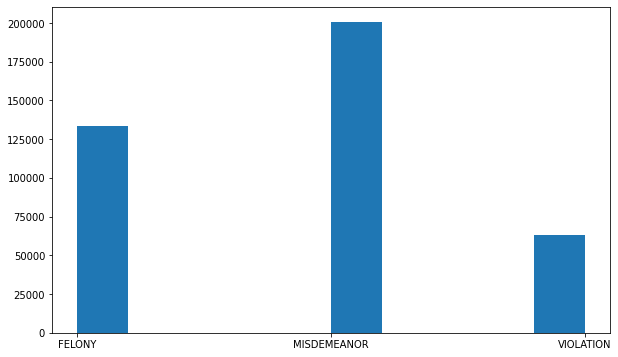

In [ ]:
print('Unique values for LAW_CAT_CD: ', data['LAW_CAT_CD'].unique())
plt.figure(figsize = (10,6))
plt.hist(data['LAW_CAT_CD'])
plt.show()

In [ ]:
print('Unique values for KY_CD: ',len(data['KY_CD'].unique()), data['KY_CD'].unique())

offense_desc_list = data['OFNS_DESC'].unique()

print('Number of unique values for OFNS_DESC: ', len(offense_desc_list))
print('Unique values for OFNS_DESC: ', offense_desc_list)


Unique values for KY_CD:  65 [105 104 109 112 116 341 578 351 125 126 233 117 344 361 106 113 121 359
 353 340 107 352 110 232 343 348 118 122 347 365 101 355 358 236 114 678
 364 124 235 111 350 115 103 120 346 238 231 342 363 572 675 230 677 349
 102 354 455 119 571 345 356 250 237 366 676]
Number of unique values for OFNS_DESC:  63
Unique values for OFNS_DESC:  ['ROBBERY' 'RAPE' 'GRAND LARCENY' 'THEFT-FRAUD' 'SEX CRIMES'
 'PETIT LARCENY' 'HARRASSMENT 2' 'CRIMINAL MISCHIEF & RELATED OF'
 'NYS LAWS-UNCLASSIFIED FELONY' 'MISCELLANEOUS PENAL LAW'
 'DANGEROUS DRUGS' 'ASSAULT 3 & RELATED OFFENSES'
 'OFF. AGNST PUB ORD SENSBLTY &' 'FELONY ASSAULT' 'FORGERY'
 'OFFENSES AGAINST PUBLIC ADMINI' 'UNAUTHORIZED USE OF A VEHICLE' 'FRAUDS'
 'BURGLARY' 'CRIMINAL TRESPASS' 'GRAND LARCENY OF MOTOR VEHICLE'
 'POSSESSION OF STOLEN PROPERTY' 'THEFT OF SERVICES'
 'VEHICLE AND TRAFFIC LAWS' 'DANGEROUS WEAPONS' 'GAMBLING'
 'INTOXICATED & IMPAIRED DRIVING' 'ADMINISTRATIVE CODE'
 'MURDER & NON-NEGL. MANSLAUGH

In [ ]:
#remove rows which don't have Latitude/Longitude
print(len(data.index))
print(data.loc[:, ['Latitude', 'Longitude']].describe())
filtered_data = data.loc[data['Latitude'].notnull(), :]
filtered_data = filtered_data.loc[filtered_data['Longitude'].notnull(), :]
print(filtered_data.loc[:, ['Latitude', 'Longitude']].isnull().any())
print(len(filtered_data.index))

396978
            Latitude      Longitude
count  396969.000000  396969.000000
mean       40.736895     -73.924595
std         0.081697       0.076802
min        40.499393     -74.254161
25%        40.676281     -73.974570
50%        40.734681     -73.927811
75%        40.810352     -73.880803
max        40.912714     -73.700286
Latitude     False
Longitude    False
dtype: bool
396969


In [ ]:
#Too slow, do not use
import geopy
from geopy.extra.rate_limiter import RateLimiter
import pandas as pd

from tqdm import tqdm
tqdm.pandas()


def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator((df[lat_field], df[lon_field]))
    return location.raw['address']['postcode']


geolocator = geopy.Nominatim(user_agent='my-application-nyc-crime', timeout = 120)
rgeocode = RateLimiter(geolocator.reverse, min_delay_seconds=0.01)

total = len(filtered_data.index)
max_count = 50000
start = 0

while start < total:
  zipcodes = filtered_data.iloc[start:min(start+max_count, total), :].progress_apply(get_zipcode, axis=1, geolocator=rgeocode, lat_field='Latitude', lon_field='Longitude')
  d = {'Zipcodes':zipcodes}
  df = pd.DataFrame(data = d)
  df.to_csv(os.path.join(cur_dir, data_dir, f'zipcodes_{start}.csv'))
  start += max_count


In [ ]:
pdf = filtered_data

if 'zipcode' not in pdf.columns:
  pdf.insert(3, "zipcode", np.zeros(len(pdf.index)), True)

print(pdf.columns)

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'zipcode', 'CMPLNT_FR_DT',
       'CMPLNT_FR_TM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD',
       'HADEVELOPT', 'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD',
       'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM',
       'PATROL_BORO', 'PD_CD', 'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT',
       'STATION_NAME', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX',
       'TRANSIT_DISTRICT', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX',
       'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lat_Lon',
       'New Georeferenced Column'],
      dtype='object')


In [ ]:
pdf = pd.read_csv(os.path.join(cur_dir, data_dir, 'data_uszipcodes1.csv'))
pdf['zipcode'] = pdf['zipcode'].astype(int)
pdf['zipcode'] = pdf['zipcode'].astype(str).str.zfill(5)

print(pdf.iloc[245999,:])
print(pdf['zipcode'].min())

# pdf.to_csv(os.path.join(cur_dir, data_dir, 'data_uszipcodes1.csv'), index = False)

CMPLNT_NUM                                                          247290761
ADDR_PCT_CD                                                               6.0
BORO_NM                                                             MANHATTAN
zipcode                                                                 10012
CMPLNT_FR_DT                                                       06/23/2022
CMPLNT_FR_TM                                                         13:10:00
CMPLNT_TO_DT                                                       06/26/2022
CMPLNT_TO_TM                                                         19:30:00
CRM_ATPT_CPTD_CD                                                    COMPLETED
HADEVELOPT                                                             (null)
HOUSING_PSA                                                               NaN
JURISDICTION_CODE                                                           0
JURIS_DESC                                                   N.Y

In [ ]:
#Run to generate zipcodes for each row and periodically save to file
from uszipcode import SearchEngine

search = SearchEngine()

total = len(pdf.index)
max_count = 2000
start = 146000

while start < total:
  tic = time.time()
  batch_zips = []
  for idx in range(start, min(start+max_count, total)):
    try:
      batch_zips.append(int(search.by_coordinates(
                    pdf['Latitude'][idx], pdf['Longitude'][idx], 
                    returns=1)[0].to_dict()["zipcode"]))
    except:
      batch_zips.append(-99999)
  # batch_zips_int = [int(z) for z in batch_zips]
  pdf.iloc[start:min(start+max_count, total), pdf.columns.get_loc('zipcode')] = np.reshape(batch_zips, (len(batch_zips), 1))
  # print(batch_zips, (np.array(batch_zips_int) == 0).astype(int).sum())
  toc = time.time()
  pdf.to_csv(os.path.join(cur_dir, data_dir, 'data_uszipcodes.csv'))
  start += max_count
  print('time taken: ', toc-tic)

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...


KeyboardInterrupt: ignored

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 28 kB/s 
     |████████████████████████████████| 199 kB 46.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=ba1257e67e6f204bcc3a4748d9becba5a4731f3d9fc8213530582605bcee05da
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [ ]:
hist_data = pd.read_csv(os.path.join(cur_dir, data_dir, 'NYPD_Complaint_Data_Historic.csv'))
#remove rows which don't have Latitude/Longitude
print(len(hist_data.index))
filtered_hist_data = hist_data.loc[hist_data['Latitude'].notnull(), :]
filtered_hist_data = filtered_hist_data.loc[filtered_hist_data['Longitude'].notnull(), :]
print(filtered_hist_data.loc[:, ['Latitude', 'Longitude']].isnull().any())
print(len(filtered_hist_data.index))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


7825499
Latitude     False
Longitude    False
dtype: bool
7808160


In [ ]:
import pandas as pd
import numpy as np
from uszipcode import SearchEngine
import sqlite3
from pyspark.sql.functions import udf, col
from pyspark.context import SparkContext
# sc = SparkContext('local', 'test')

search =  SearchEngine(db_file_path="/tmp/db/simple_db.sqlite")
conn = sqlite3.connect("/tmp/db/simple_db.sqlite")
pdf = pd.read_sql_query("select  zipcode, lat, lng, radius_in_miles, bounds_west, bounds_east, bounds_north, bounds_south from simple_zipcode", conn)
brd_pdf = sc.broadcast(pdf)

                        
@udf('string')
def get_zip_b(lat, lng):
    pdf = brd_pdf.value
    try:
        out = pdf[(pdf['bounds_north']>=lat) & 
                  (pdf['bounds_south']<=lat) & 
                  (pdf['bounds_west']<=lng) &  
                  (pdf['bounds_east']>=lng) ]
        dist = [None]*len(out)
        for i in range(len(out)):
            dist[i] = (out['lat'].iloc[i]-lat)**2 + (out['lng'].iloc[i]-lng)**2
        zip = out['zipcode'].iloc[dist.index(min(dist))]
    except:
        zip = 'bad'
    return zip


output_df = filtered_hist_data.withColumn('zipcode', get_zip_b(col("latitude"),col("longitude"))).cache()

Download /tmp/db/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


AttributeError: ignored

In [ ]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396969 entries, 0 to 396968
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CMPLNT_NUM                396969 non-null  object 
 1   ADDR_PCT_CD               396958 non-null  float64
 2   BORO_NM                   396969 non-null  object 
 3   zipcode                   396969 non-null  object 
 4   CMPLNT_FR_DT              396969 non-null  object 
 5   CMPLNT_FR_TM              396969 non-null  object 
 6   CMPLNT_TO_DT              367585 non-null  object 
 7   CMPLNT_TO_TM              396969 non-null  object 
 8   CRM_ATPT_CPTD_CD          396969 non-null  object 
 9   HADEVELOPT                396969 non-null  object 
 10  HOUSING_PSA               25466 non-null   float64
 11  JURISDICTION_CODE         396969 non-null  int64  
 12  JURIS_DESC                396969 non-null  object 
 13  KY_CD                     396969 non-null  i

In [14]:
#only considering data for current year
import datetime
#Use the following to read using dtype information
pdf_types = pd.read_csv(os.path.join(cur_dir, data_dir, 'current_cleaned_types.csv'))['types']
pdf = pd.read_csv(os.path.join(cur_dir, data_dir, 'current_cleaned_data.csv'), dtype=pdf_types.to_dict(), parse_dates = ['RPT_DT', 'CMPLNT_DT_TS'])
recent_pdf = pdf.loc[(pdf['CMPLNT_DT_TS'] >= datetime.datetime(2022, 1, 1)), :]

In [15]:
print(len(recent_pdf.index)/len(pdf.index))
recent_pdf.info()

1.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 385373 entries, 0 to 385372
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   CMPLNT_NUM                385373 non-null  object        
 1   ADDR_PCT_CD               385373 non-null  float64       
 2   BORO_NM                   385373 non-null  object        
 3   zipcode                   385373 non-null  object        
 4   CRM_ATPT_CPTD_CD          385373 non-null  object        
 5   JURISDICTION_CODE         385373 non-null  int64         
 6   JURIS_DESC                385373 non-null  object        
 7   KY_CD                     385373 non-null  int64         
 8   LAW_CAT_CD                385373 non-null  object        
 9   OFNS_DESC                 385373 non-null  object        
 10  PATROL_BORO               385373 non-null  object        
 11  PD_CD                     385373 non-null  float64       
 12

In [16]:
#set Year to the right value using CMPLNT_FR_DT
# recent_pdf['Year'] = recent_pdf['CMPLNT_DT_TS'].str[-4:].astype(int)
recent_pdf['Year'] = recent_pdf['CMPLNT_DT_TS'].dt.year
# recent_pdf.info()

counts_by_year_zip_cat = recent_pdf.loc[:, ['CMPLNT_NUM', 'Year', 'zipcode', 'LAW_CAT_CD']].groupby(by = ['Year', 'zipcode', 'LAW_CAT_CD']).count()
# counts_by_year_zip_cat.to_csv(os.path.join(cur_dir, data_dir, 'counts_by_year_zip_cat.csv'))
# #index is 'Year', 'zipcode', 'LAW_CAT_CD' values, 


In [ ]:
input_data = pd.DataFrame(columns = ['zipcode', 'FelonyCount', 'MisdemeanorCount', 'ViolationCount'])
for zip in counts_by_year_zip_cat.index.levels[1]:
  zip_counts = counts_by_year_zip_cat.xs(zip, level='zipcode')
  
  felonyCount, misdemeanorCount, violationCount = 0, 0, 0
  if 'FELONY' in zip_counts.index.get_level_values(1):
    felonyCount = zip_counts.xs('FELONY', level = 'LAW_CAT_CD').sum()[0]
  if 'MISDEMEANOR' in zip_counts.index.get_level_values(1):
    misdemeanorCount = zip_counts.xs('MISDEMEANOR', level = 'LAW_CAT_CD').sum()[0]
  if 'VIOLATION' in zip_counts.index.get_level_values(1):
    violationCount = zip_counts.xs('VIOLATION', level = 'LAW_CAT_CD').sum()[0]
  input_data.loc[len(input_data.index), : ] = [zip, felonyCount, misdemeanorCount, violationCount]
# input_data.index = input_data['zipcode']
# # each row should have [FelonyCount, MisdemeanorCount, ViolationCount] where the index is zipcode

In [ ]:
zip_populations = pd.read_csv(os.path.join(cur_dir, data_dir, 'ZipcodePopulation.csv'), dtype={0:str, 1:int})
zip_populations.describe()

Population
count    1754.000000
mean    11125.837514
std     17767.194709
min         6.000000
25%       937.250000
50%      3147.500000
75%     13024.500000
max    108661.000000

In [ ]:
# input_data = input_data.drop(labels = ['zipcode'], axis = 1)
input_data_pop = input_data.merge(zip_populations, left_on = ['zipcode'], right_on = 'Zipcode', how = 'left')
input_data_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 195
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   zipcode           196 non-null    object 
 1   FelonyCount       196 non-null    object 
 2   MisdemeanorCount  196 non-null    object 
 3   ViolationCount    196 non-null    object 
 4   Zipcode           183 non-null    object 
 5   Population        183 non-null    float64
dtypes: float64(1), object(5)
memory usage: 10.7+ KB


In [ ]:
input_data_pop.loc[input_data_pop['Zipcode'].isnull(), :]

zipcode FelonyCount MisdemeanorCount ViolationCount Zipcode  Population
0     07002           4                5              0     NaN         NaN
1     07008           4               10              4     NaN         NaN
2     07020          42               91             18     NaN         NaN
3     07077           0                1              1     NaN         NaN
15    10015         179              436            126     NaN         NaN
20    10020        1240             1935            265     NaN         NaN
42    10098        2569             3106            549     NaN         NaN
43    10115         600              781            250     NaN         NaN
56    10311          32               87             32     NaN         NaN
137   11240         789             1711            493     NaN         NaN
138   11351         184              450             65     NaN         NaN
144   11359          12               16             14     NaN         NaN
156   11371         160              252             99     NaN         NaN

In [ ]:
input_data_pop.index = input_data_pop['zipcode']
print(input_data_pop.describe())
print(input_data_pop['FelonyCount'].max(), input_data_pop['MisdemeanorCount'].max(), input_data_pop['ViolationCount'].max())
print(counts_by_year_zip_cat.describe())
print(counts_by_year_zip_cat.xs('10001', level='zipcode').xs('FELONY', level = 'LAW_CAT_CD').sum().iloc[0])
if 'zipcode' in input_data_pop.columns:
  input_data_pop = input_data_pop.drop(labels = ['zipcode'], axis = 1)
print(input_data_pop.head())

          Population
count     183.000000
mean    45495.868852
std     26731.754394
min       220.000000
25%     25066.500000
50%     40300.000000
75%     64763.000000
max    108661.000000
2602 3143 1339
        CMPLNT_NUM
count   584.000000
mean    659.885274
std     629.433017
min       1.000000
25%     204.500000
50%     460.500000
75%     939.250000
max    3143.000000
575
        FelonyCount MisdemeanorCount ViolationCount Zipcode  Population
zipcode                                                                
07002             4                5              0     NaN         NaN
07008             4               10              4     NaN         NaN
07020            42               91             18     NaN         NaN
07077             0                1              1     NaN         NaN
10001           575              760            232   10001     25026.0


In [ ]:
input_data_pop = input_data_pop.dropna()
input_data_pop['FelonyCountPerCapita'] = 100 * input_data_pop['FelonyCount'] / input_data_pop['Population']
input_data_pop['MisdemeanorCountPerCapita'] = 100 * input_data_pop['MisdemeanorCount'] / input_data_pop['Population']
input_data_pop['ViolationCountPerCapita'] = 100 * input_data_pop['ViolationCount'] / input_data_pop['Population']
input_data_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 10001 to 11697
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FelonyCount                183 non-null    object 
 1   MisdemeanorCount           183 non-null    object 
 2   ViolationCount             183 non-null    object 
 3   Zipcode                    183 non-null    object 
 4   Population                 183 non-null    float64
 5   FelonyCountPerCapita       183 non-null    object 
 6   MisdemeanorCountPerCapita  183 non-null    object 
 7   ViolationCountPerCapita    183 non-null    object 
dtypes: float64(1), object(7)
memory usage: 12.9+ KB


<ipython-input-23-90d050cccf14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data_pop['FelonyCountPerCapita'] = 100 * input_data_pop['FelonyCount'] / input_data_pop['Population']
<ipython-input-23-90d050cccf14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data_pop['MisdemeanorCountPerCapita'] = 100 * input_data_pop['MisdemeanorCount'] / input_data_pop['Population']
<ipython-input-23-90d050cccf14>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

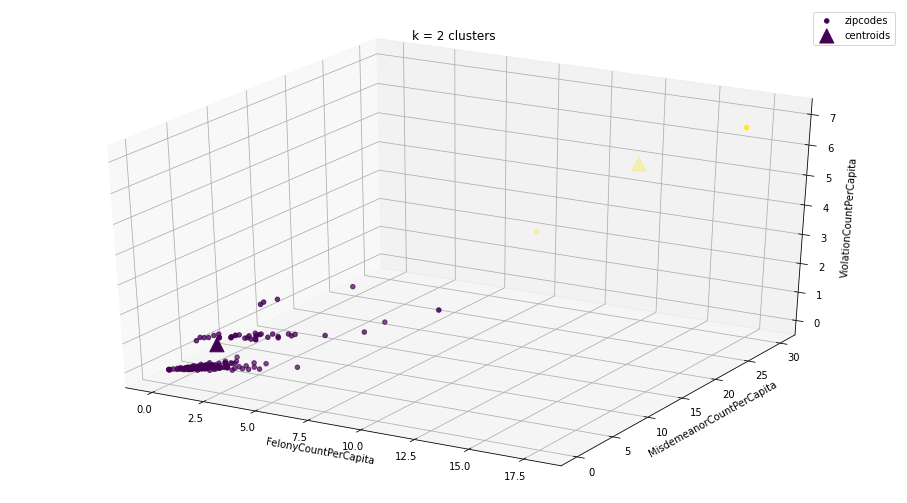

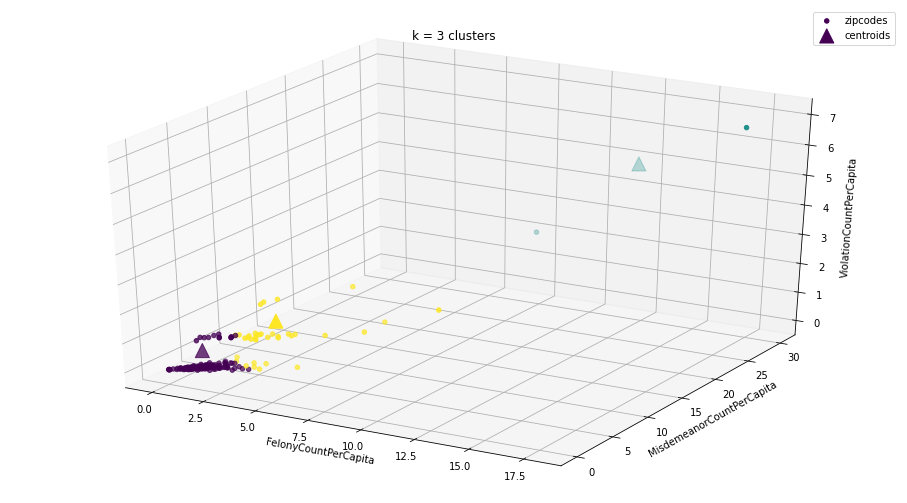

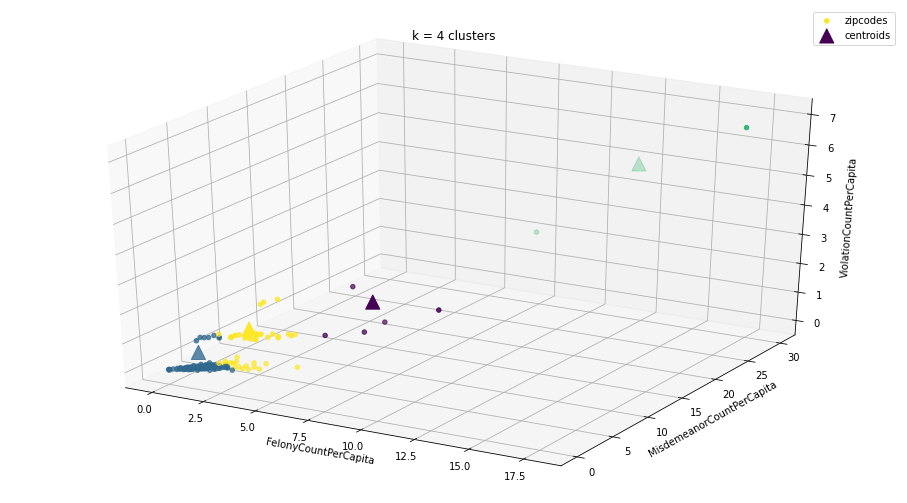

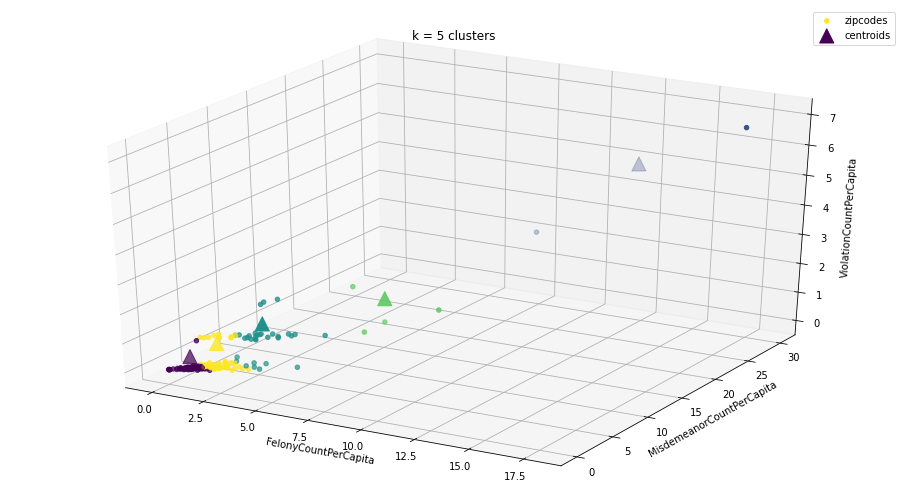

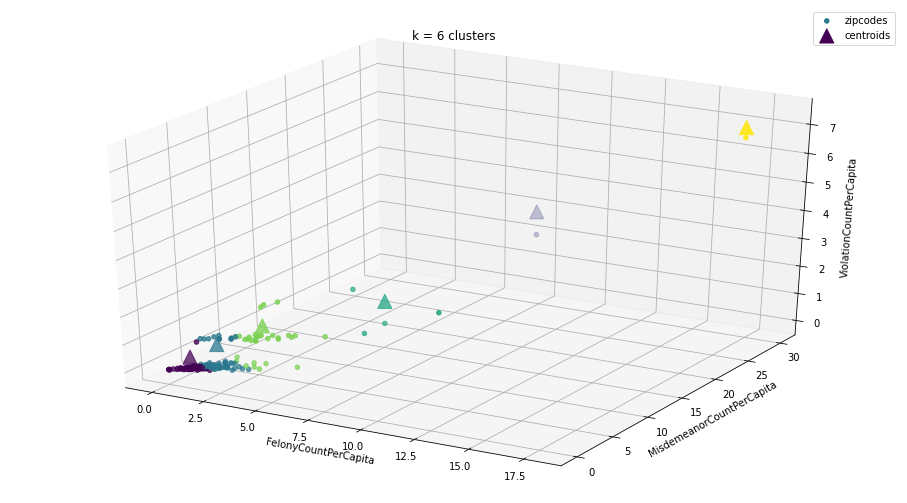

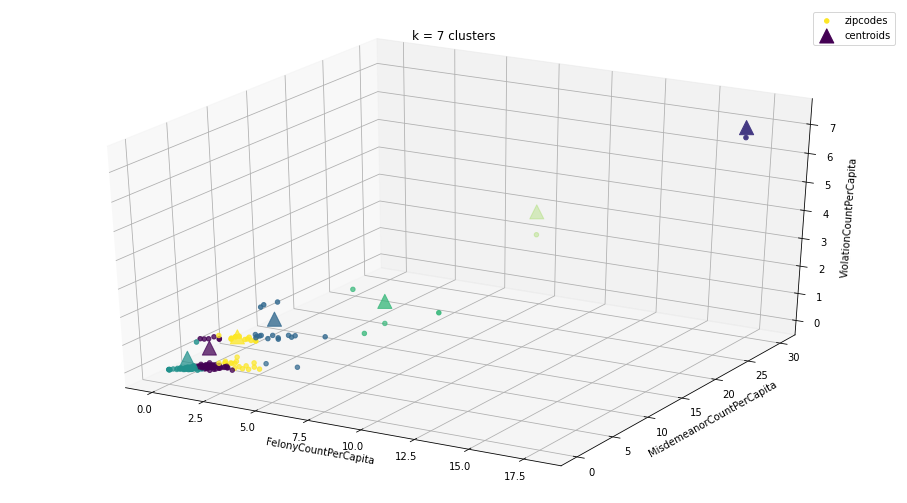

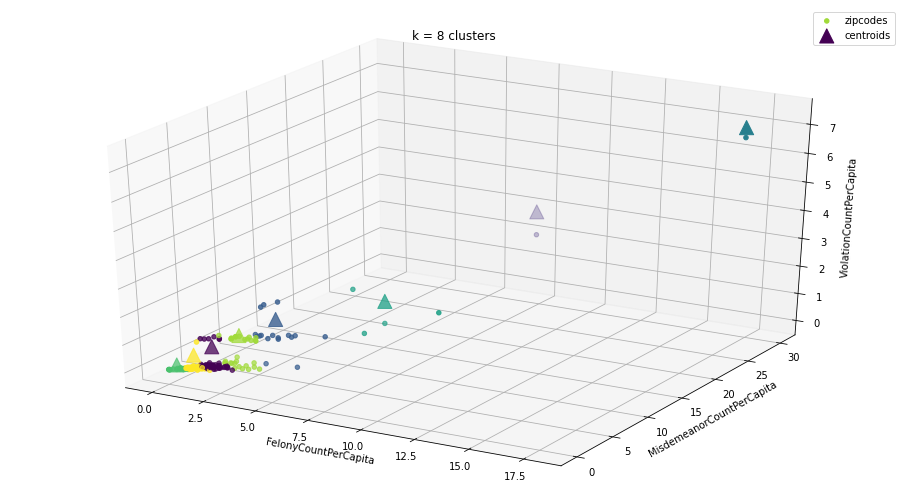

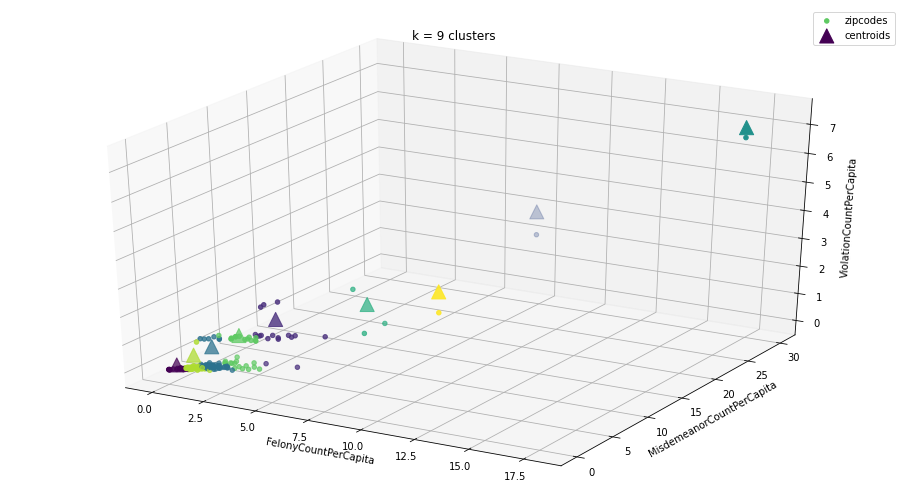

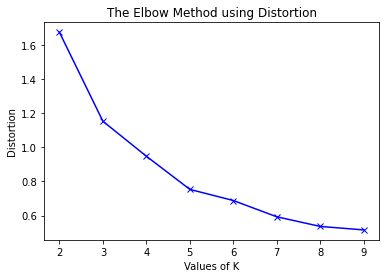

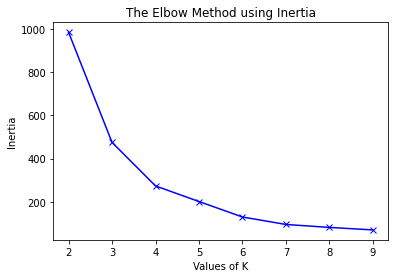

In [ ]:
#unsupervised classification of zipcodes
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.spatial.distance import cdist

k_vals = list(range(2,10))
distortions = []
inertias = []
for k in k_vals:
  X = input_data_pop.loc[:, ['FelonyCountPerCapita', 'MisdemeanorCountPerCapita', 'ViolationCountPerCapita']].values
  X = X.astype(float)

  kmeans = KMeans(init="k-means++", n_clusters=k, n_init=4, random_state=0)
  kmeans = kmeans.fit(X)
  labels = kmeans.labels_
  
  distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
  inertias.append(kmeans.inertia_)

  # plot clusters
  xs = input_data_pop['FelonyCountPerCapita'].values.flatten()
  ys = input_data_pop['MisdemeanorCountPerCapita'].values.flatten()
  zs = input_data_pop['ViolationCountPerCapita'].values.flatten()
  fig = plt.figure(figsize = (16, 9))
  ax = fig.add_subplot(projection='3d')
  ax.scatter(xs, ys, zs.astype(int), c=labels, label='zipcodes')

  xc = []
  yc = []
  zc = []
  for center in kmeans.cluster_centers_:
    xc.append(center[0])
    yc.append(center[1])
    zc.append(center[2])
  
  ax.scatter(xc, yc, zc, c=[i for i in range(k)], marker = '^', s = 200, label = 'centroids')

  ax.set_xlabel('FelonyCountPerCapita')
  ax.set_ylabel('MisdemeanorCountPerCapita')
  ax.set_zlabel('ViolationCountPerCapita')
  plt.legend()
  plt.title(f'k = {k} clusters')
  plt.show()


plt.plot(k_vals, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


plt.plot(k_vals, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

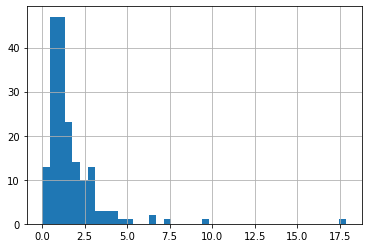

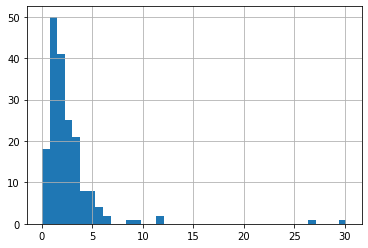

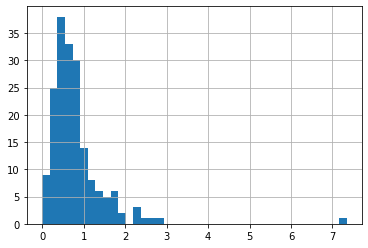

FelonyCount MisdemeanorCount ViolationCount Zipcode  Population  \
zipcode                                                                   
10018          1455             2196            597   10018      8135.0   
11109           584              594            168   11109      6127.0   
10005           630             2614            246   10005      8664.0   
10013          1824             2462            390   10013     28657.0   
11430            14               25              3   11430       220.0   
...             ...              ...            ...     ...         ...   
11581             8               17              7   11581     21847.0   
11001             7               13              3   11001     26542.0   
10705             7               17              3   10705     39848.0   
11020             1                1              0   11020      6325.0   
10004             0                2              2   10004      3310.0   

        FelonyCountPerCapita MisdemeanorCountPerCapita ViolationCountPerCapita  
zipcode                                                                         
10018              17.885679                 26.994468                 7.33866  
11109               9.531582                  9.694794                2.741962  
10005               7.271468                 30.170822                2.839335  
10013               6.364937                  8.591269                1.360924  
11430               6.363636                 11.363636                1.363636  
...                      ...                       ...                     ...  
11581               0.036618                  0.077814                0.032041  
11001               0.026373                  0.048979                0.011303  
10705               0.017567                  0.042662                0.007529  
11020                0.01581                   0.01581                     0.0  
10004                    0.0                  0.060423                0.060423  

[183 rows x 8 columns]

In [ ]:
input_data_pop['FelonyCountPerCapita'].hist(bins = 40)
plt.show()
input_data_pop['MisdemeanorCountPerCapita'].hist(bins = 40)
plt.show()
input_data_pop['ViolationCountPerCapita'].hist(bins = 40)
plt.show()

input_data_pop.sort_values(by = ['FelonyCountPerCapita'], ascending = False)

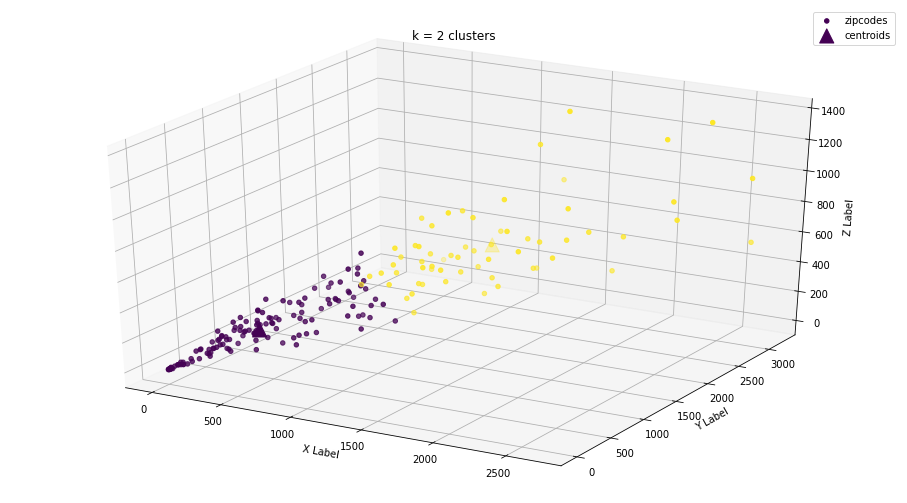

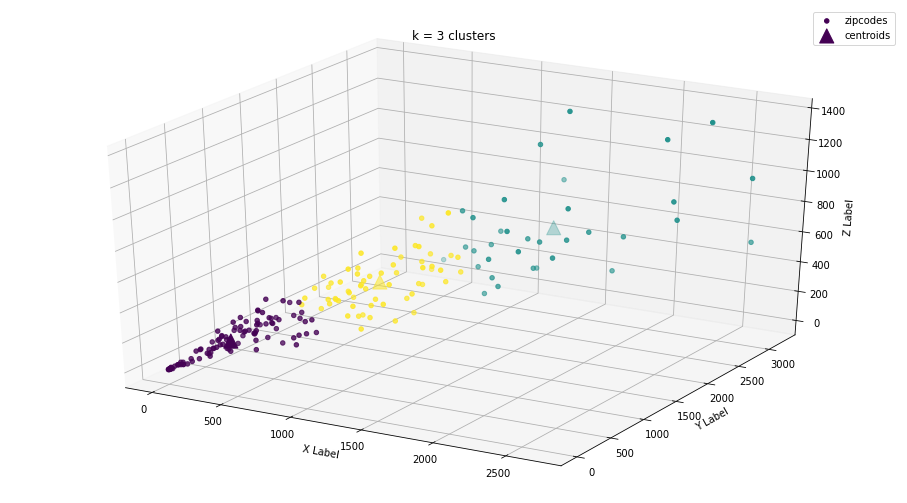

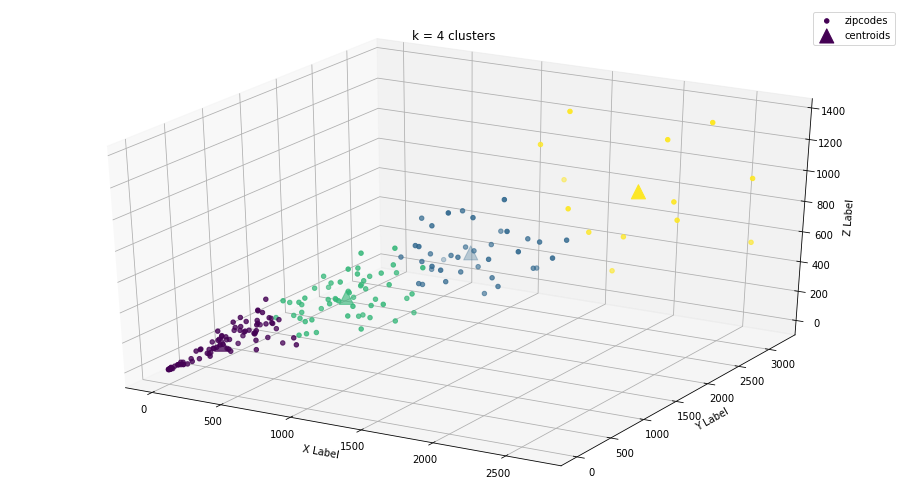

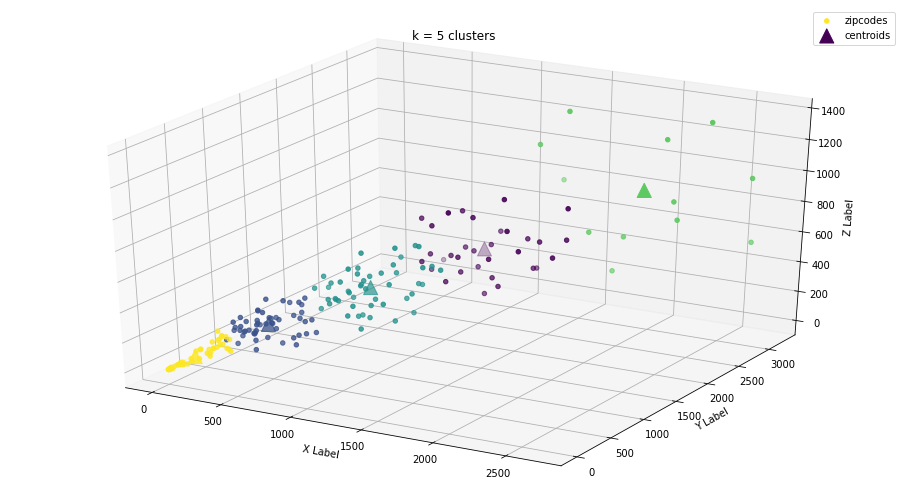

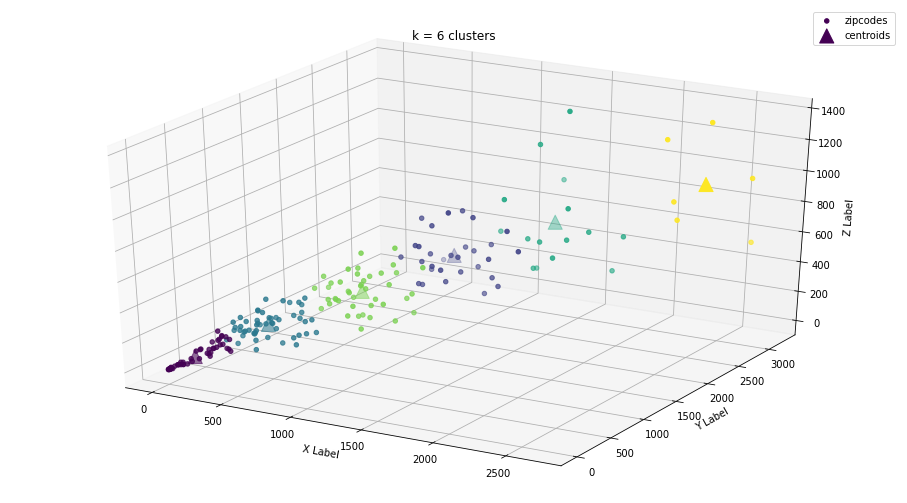

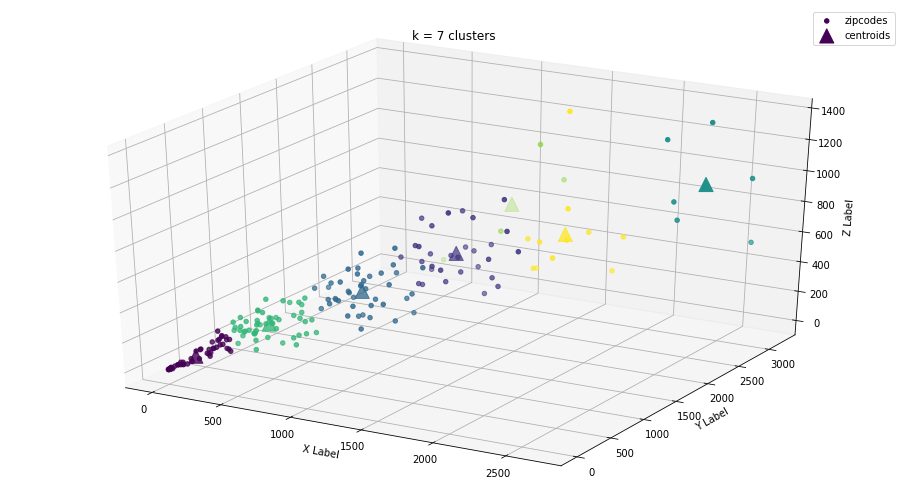

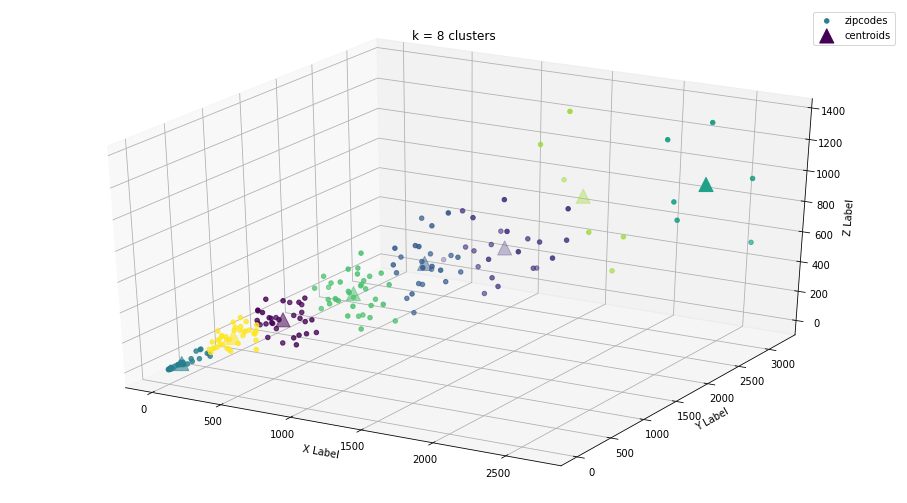

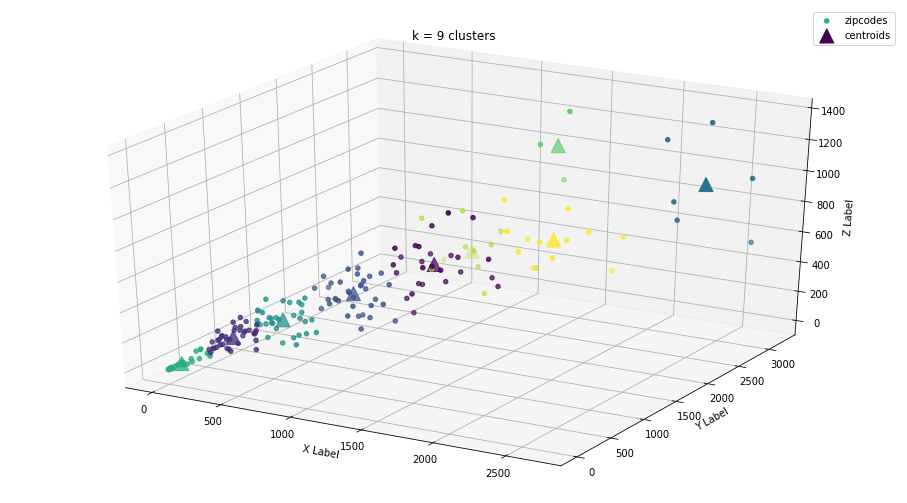

In [ ]:
#unsupervised classification of zipcodes
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

k_vals = list(range(2,10))
for k in k_vals:
  kmeans = KMeans(init="k-means++", n_clusters=k, n_init=4, random_state=0)
  kmeans = kmeans.fit(input_data)
  labels = kmeans.labels_
  
  # plot clusters
  xs = input_data['FelonyCount'].values.flatten()
  ys = input_data['MisdemeanorCount'].values.flatten()
  zs = input_data['ViolationCount'].values.flatten()
  fig = plt.figure(figsize = (16, 9))
  ax = fig.add_subplot(projection='3d')
  ax.scatter(xs, ys, zs.astype(int), c=labels, label='zipcodes')

  xc = []
  yc = []
  zc = []
  for center in kmeans.cluster_centers_:
    xc.append(center[0])
    yc.append(center[1])
    zc.append(center[2])
  
  ax.scatter(xc, yc, zc, c=[i for i in range(k)], marker = '^', s = 200, label = 'centroids')

  ax.set_xlabel('X Label')
  ax.set_ylabel('Y Label')
  ax.set_zlabel('Z Label')
  plt.legend()
  plt.title(f'k = {k} clusters')
  plt.show()


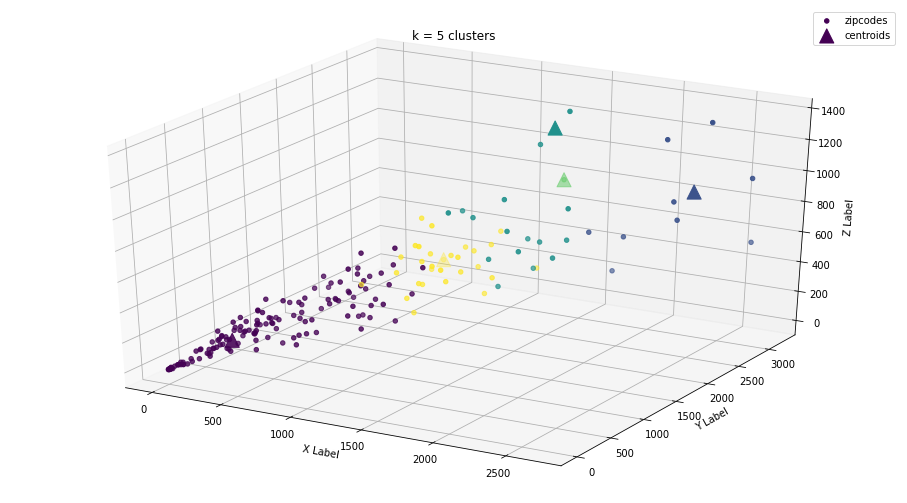

In [ ]:
from sklearn.cluster import MeanShift

k_vals = list(range(2,3))
for k in k_vals:
  model = MeanShift()
  model = model.fit(input_data)
  labels = model.labels_
  
  # plot clusters
  xs = input_data['FelonyCount'].values.flatten()
  ys = input_data['MisdemeanorCount'].values.flatten()
  zs = input_data['ViolationCount'].values.flatten()
  fig = plt.figure(figsize = (16, 9))
  ax = fig.add_subplot(projection='3d')
  ax.scatter(xs, ys, zs.astype(int), c=labels, label='zipcodes')

  xc = []
  yc = []
  zc = []
  for center in model.cluster_centers_:
    xc.append(center[0])
    yc.append(center[1])
    zc.append(center[2])
  
  ax.scatter(xc, yc, zc, c=[i for i in range(len(model.cluster_centers_))], marker = '^', s = 200, label = 'centroids')

  ax.set_xlabel('X Label')
  ax.set_ylabel('Y Label')
  ax.set_zlabel('Z Label')
  plt.legend()
  plt.title(f'k = {len(model.cluster_centers_)} clusters')
  plt.show()


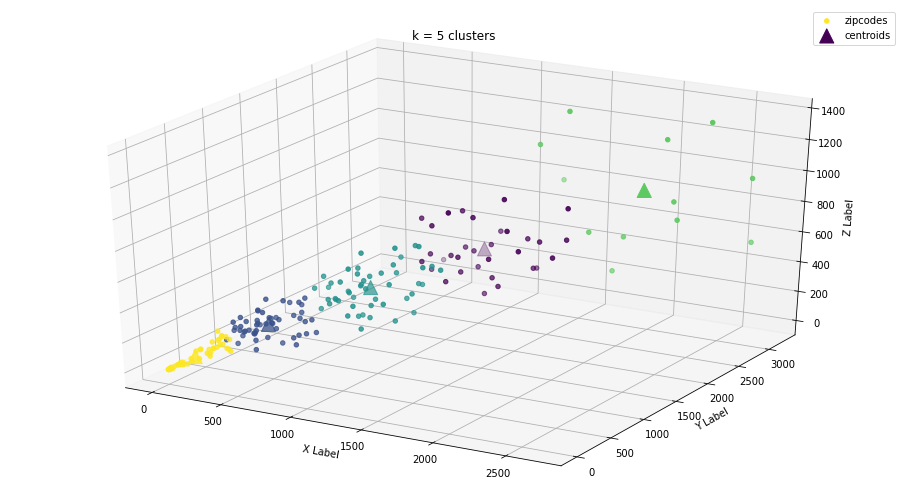

[[1283.5625     1996.75        559.15625   ]
 [ 400.53846154  642.36538462  220.25      ]
 [ 831.69387755 1253.20408163  395.85714286]
 [2058.5        2737.16666667  899.91666667]
 [ 108.90196078  170.37254902   66.47058824]]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

k_vals = list(range(5,6))
for k in k_vals:
  kmeans = KMeans(init="k-means++", n_clusters=k, n_init=4, random_state=0)
  kmeans = kmeans.fit(input_data)
  labels = kmeans.labels_
  
  # plot clusters
  xs = input_data['FelonyCount'].values.flatten()
  ys = input_data['MisdemeanorCount'].values.flatten()
  zs = input_data['ViolationCount'].values.flatten()
  fig = plt.figure(figsize = (16, 9))
  ax = fig.add_subplot(projection='3d')
  ax.scatter(xs, ys, zs.astype(int), c=labels, label='zipcodes')

  xc = []
  yc = []
  zc = []
  for center in kmeans.cluster_centers_:
    xc.append(center[0])
    yc.append(center[1])
    zc.append(center[2])
  
  ax.scatter(xc, yc, zc, c=[i for i in range(k)], marker = '^', s = 200, label = 'centroids')

  ax.set_xlabel('X Label')
  ax.set_ylabel('Y Label')
  ax.set_zlabel('Z Label')
  plt.legend()
  plt.title(f'k = {k} clusters')
  plt.show()
  print(kmeans.cluster_centers_)


In [ ]:
#Find zipcodes for precincts
temp = pd.read_csv(os.path.join(cur_dir, data_dir, 'precinct-data.csv'))
#Too slow, do not use
import geopy
from geopy.extra.rate_limiter import RateLimiter
import pandas as pd

from tqdm import tqdm
tqdm.pandas()


def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator((df[lat_field], df[lon_field]))
    return location.raw['address']['postcode']


geolocator = geopy.Nominatim(user_agent='my-application-nyc-crime', timeout = 120)
rgeocode = RateLimiter(geolocator.reverse, min_delay_seconds=0.01)

total = len(temp.index)
max_count = 2000
start = 0
temp['PCT_zipcode'] = np.zeros(total)
while start < total:
  zipcodes = temp.iloc[start:min(start+max_count, total), :].progress_apply(get_zipcode, axis=1, geolocator=rgeocode, lat_field='PCT_Latitude', lon_field='PCT_Longitude')
  # d = {'Zipcodes':zipcodes}
  temp.iloc[:, temp.columns.get_loc('PCT_zipcode')] = zipcodes
  temp.to_csv(os.path.join(cur_dir, data_dir, 'precinct_data.csv'))
  start += max_count


100%|██████████| 77/77 [00:43<00:00,  1.77it/s]


In [ ]:
!pip install geopandas
!pip install geoplot
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import geoplot
from geopandas import GeoDataFrame


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.6 MB/s 
     |████████████████████████████████| 7.8 MB 44.2 MB/s 
     |████████████████████████████████| 16.6 MB 40.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.9 MB 10.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 34.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 34.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 37.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |██████████████████████████████

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


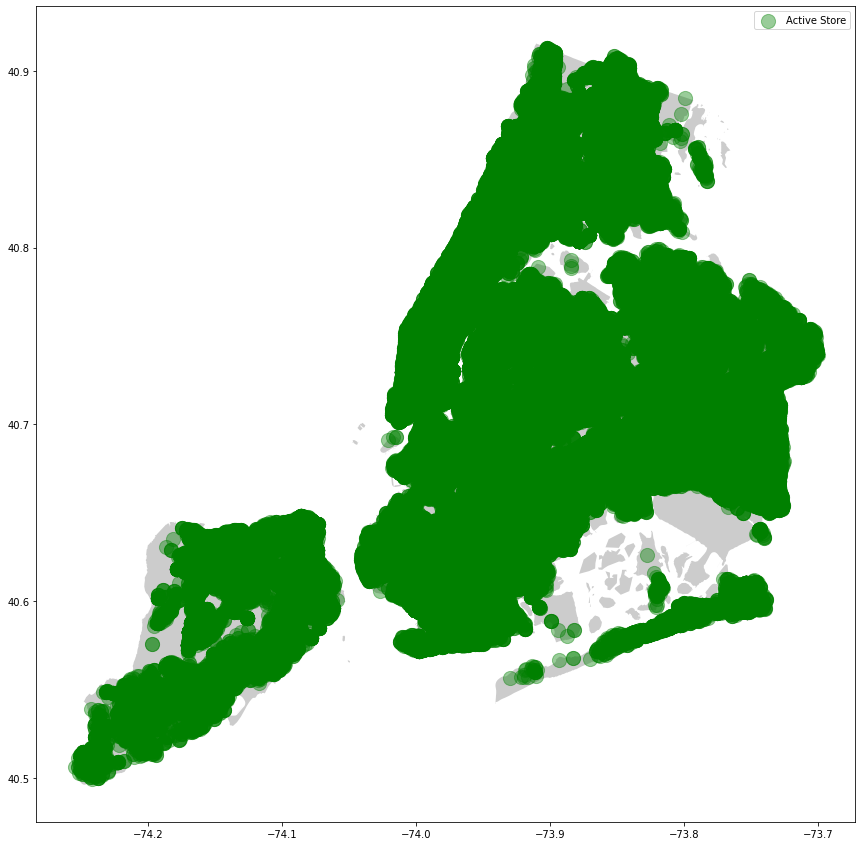

In [ ]:

geometry = [Point(x, y) for x, y in zip(recent_pdf['Longitude'].astype(float).values, recent_pdf['Latitude'].astype(float).values)]
gdf = GeoDataFrame(recent_pdf, geometry=geometry)   

crs={'init':'epsg:4326'}

boroughs = gpd.read_file(geoplot.datasets.get_path('nyc_boroughs'))

geo_df=gpd.GeoDataFrame(recent_pdf,crs=crs,geometry=gpd.points_from_xy(recent_pdf["Longitude"], recent_pdf["Latitude"]))



fig,ax=plt.subplots(figsize=(15,15))
boroughs.plot(ax=ax,alpha=0.4,color="grey")
geo_df.plot(ax=ax,markersize=200, alpha=0.4,color="green", label="Active Store")
plt.legend()

In [ ]:
ofns_subset = ['MURDER & NON-NEGL. MANSLAUGHTER','RAPE','SEX CRIMES','FELONY SEX CRIMES','KIDNAPPING','FELONY ASSAULT','ARSON','OFFENSES RELATED TO CHILDREN','KIDNAPPING & RELATED OFFENSES','ROBBERY','GRAND LARCENY','GRAND LARCENY OF MOTOR VEHICLE','BURGLARY','UNAUTHORIZED USE OF A VEHICLE','THEFT-FRAUD','OTHER OFFENSES RELATED TO THEF','OFFENSES AGAINST THE PERSON','ASSAULT 3 & RELATED OFFENSES','PETIT LARCENY','PETIT LARCENY OF MOTOR VEHICLE','DANGEROUS WEAPONS','DANGEROUS DRUGS','UNLAWFUL POSS. WEAP. ON SCHOOL','INTOXICATED & IMPAIRED DRIVING','HOMICIDE-NEGLIGENT,UNCLASSIFIE','OFFENSES AGAINST PUBLIC SAFETY','HOMICIDE-NEGLIGENT-VEHICLE','INTOXICATED/IMPAIRED DRIVING','ESCAPE 3']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25326 entries, 2 to 385359
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CMPLNT_NUM                25326 non-null  object        
 1   ADDR_PCT_CD               25326 non-null  float64       
 2   BORO_NM                   25326 non-null  object        
 3   zipcode                   25326 non-null  object        
 4   CRM_ATPT_CPTD_CD          25326 non-null  object        
 5   JURISDICTION_CODE         25326 non-null  int64         
 6   JURIS_DESC                25326 non-null  object        
 7   KY_CD                     25326 non-null  int64         
 8   LAW_CAT_CD                25326 non-null  object        
 9   OFNS_DESC                 25326 non-null  object        
 10  PATROL_BORO               25326 non-null  object        
 11  PD_CD                     25326 non-null  float64       
 12  PD_DESC          

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


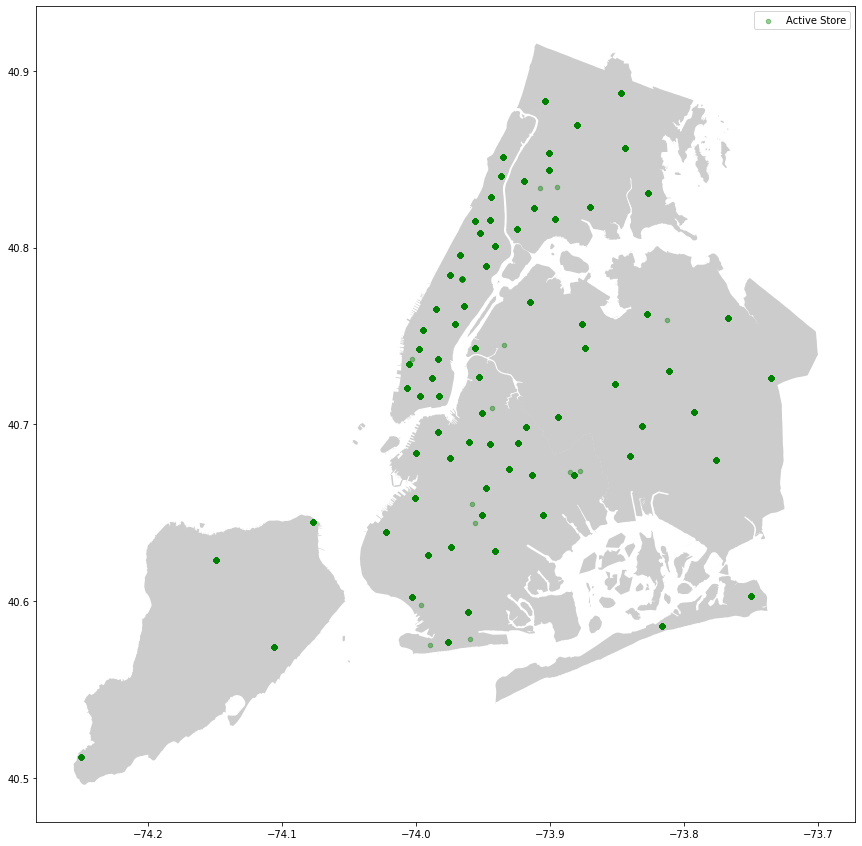

In [ ]:
plot_data = recent_pdf.loc[recent_pdf['OFNS_DESC'].isin(ofns_subset[:6]), :]
plot_data.info()
geometry = [Point(x, y) for x, y in zip(plot_data['Longitude'].astype(float).values, plot_data['Latitude'].astype(float).values)]
# gdf = GeoDataFrame(recent_pdf, geometry=geometry)   

crs={'init':'epsg:4326'}

boroughs = gpd.read_file(geoplot.datasets.get_path('nyc_boroughs'))

geo_df=gpd.GeoDataFrame(plot_data,crs=crs,geometry=gpd.points_from_xy(plot_data["Longitude"], plot_data["Latitude"]))



fig,ax=plt.subplots(figsize=(15,15))
boroughs.plot(ax=ax,alpha=0.4,color="grey")
geo_df.plot(ax=ax,markersize=20, alpha=0.4,color="green", label="Active Store")
plt.legend()

90
90


(array([1.4958e+04, 8.1400e+03, 9.6700e+02, 0.0000e+00, 4.4500e+02,
        2.1100e+02, 2.5000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 5.6700e+02,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

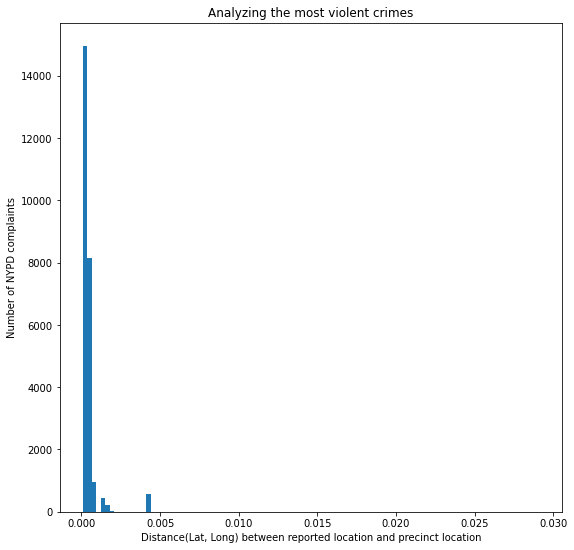

In [ ]:
# plot_data.loc[:, ["Longitude", 'Latitude']].unique_values()
print(len(plot_data["Longitude"].unique()))
print(len(plot_data["Latitude"].unique()))
pct_data = pd.read_csv(os.path.join(cur_dir, data_dir, 'precinct_data.csv'))
merged = pct_data.merge(plot_data, on = 'ADDR_PCT_CD', how = 'inner')
distances = np.power(np.square(merged['Latitude'] - merged['PCT_Latitude']) + np.square(merged['Longitude'] - merged['PCT_Longitude']), 0.5)
plt.figure(figsize = (9, 9))
plt.xlabel('Distance(Lat, Long) between reported location and precinct location')
plt.ylabel('Number of NYPD complaints')
plt.title('Analyzing the most violent crimes')
plt.hist(distances, bins = 100)

It appears that the reported location for these crimes is just the precinct locations.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13608 entries, 0 to 385347
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CMPLNT_NUM                13608 non-null  object        
 1   ADDR_PCT_CD               13608 non-null  float64       
 2   BORO_NM                   13608 non-null  object        
 3   zipcode                   13608 non-null  object        
 4   CRM_ATPT_CPTD_CD          13608 non-null  object        
 5   JURISDICTION_CODE         13608 non-null  int64         
 6   JURIS_DESC                13608 non-null  object        
 7   KY_CD                     13608 non-null  int64         
 8   LAW_CAT_CD                13608 non-null  object        
 9   OFNS_DESC                 13608 non-null  object        
 10  PATROL_BORO               13608 non-null  object        
 11  PD_CD                     13608 non-null  float64       
 12  PD_DESC          

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


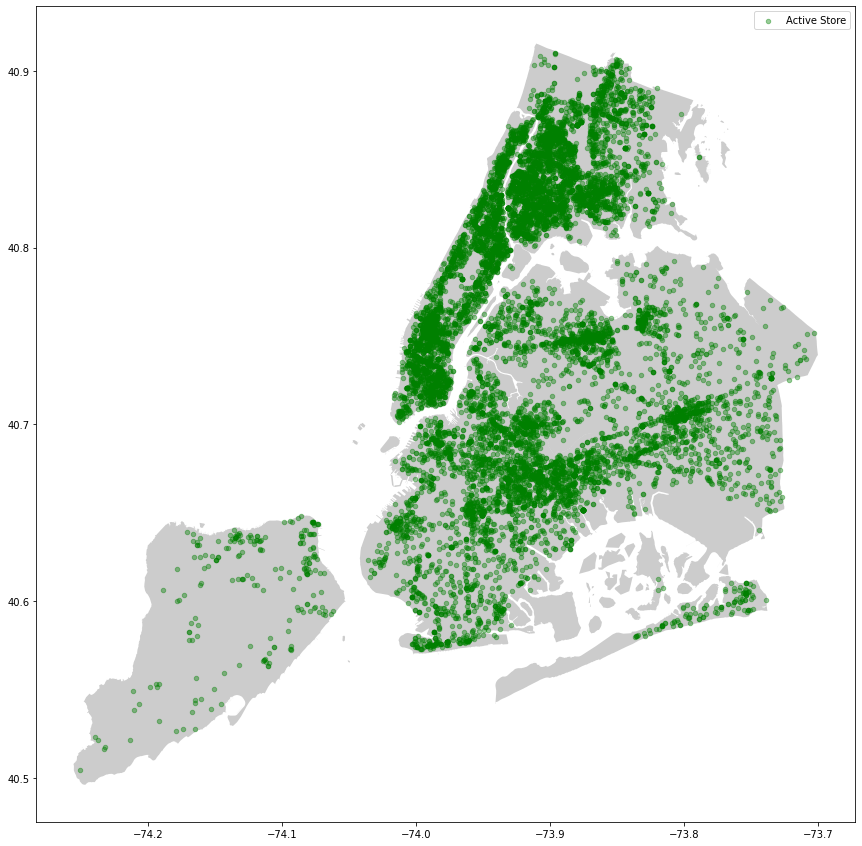

In [ ]:
plot_data = recent_pdf.loc[recent_pdf['OFNS_DESC'].isin(ofns_subset[6:10]), :]
plot_data.info()

geometry = [Point(x, y) for x, y in zip(plot_data['Longitude'].astype(float).values, plot_data['Latitude'].astype(float).values)]
# gdf = GeoDataFrame(recent_pdf, geometry=geometry)   

crs={'init':'epsg:4326'}

boroughs = gpd.read_file(geoplot.datasets.get_path('nyc_boroughs'))

geo_df=gpd.GeoDataFrame(plot_data,crs=crs,geometry=gpd.points_from_xy(plot_data["Longitude"], plot_data["Latitude"]))



fig,ax=plt.subplots(figsize=(15,15))
boroughs.plot(ax=ax,alpha=0.4,color="grey")
geo_df.plot(ax=ax,markersize=20, alpha=0.4,color="green", label="Active Store")
plt.legend()

8639
8659


(array([1.223e+03, 4.740e+02, 6.760e+02, 8.050e+02, 9.420e+02, 9.490e+02,
        9.230e+02, 7.750e+02, 8.100e+02, 8.380e+02, 6.070e+02, 5.460e+02,
        5.450e+02, 4.800e+02, 4.110e+02, 4.080e+02, 3.880e+02, 3.000e+02,
        2.620e+02, 2.180e+02, 1.560e+02, 1.470e+02, 9.900e+01, 8.500e+01,
        7.800e+01, 5.800e+01, 4.400e+01, 4.400e+01, 3.300e+01, 3.100e+01,
        2.100e+01, 2.500e+01, 1.500e+01, 1.700e+01, 9.000e+00, 5.000e+00,
        9.000e+00, 6.000e+00, 1.100e+01, 1.100e+01, 9.000e+00, 1.900e+01,
        5.000e+00, 7.000e+00, 6.000e+00, 5.000e+00, 6.000e+00, 1.000e+01,
        3.000e+00, 7.000e+00, 3.000e+00, 1.000e+00, 4.000e+00, 3.000e+00,
        3.000e+00, 5.000e+00, 6.000e+00, 4.000e+00, 3.000e+00, 2.000e+00,
        6.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

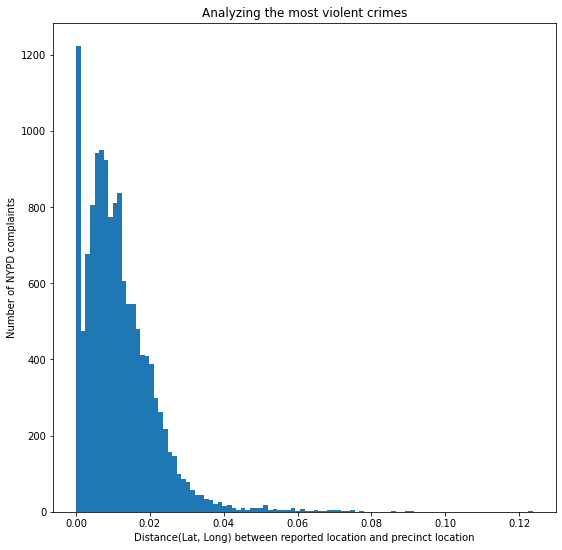

In [ ]:
# plot_data.loc[:, ["Longitude", 'Latitude']].unique_values()
print(len(plot_data["Longitude"].unique()))
print(len(plot_data["Latitude"].unique()))
pct_data = pd.read_csv(os.path.join(cur_dir, data_dir, 'precinct_data.csv'))
merged = pct_data.merge(plot_data, on = 'ADDR_PCT_CD', how = 'inner')
distances = np.power(np.square(merged['Latitude'] - merged['PCT_Latitude']) + np.square(merged['Longitude'] - merged['PCT_Longitude']), 0.5)
plt.figure(figsize = (9, 9))
plt.xlabel('Distance(Lat, Long) between reported location and precinct location')
plt.ylabel('Number of NYPD complaints')
plt.title('Analyzing the most violent crimes')
plt.hist(distances, bins = 100)

This distribution is seems natural. Therefore more realistic depiction of crime's spatial distribution.

In [ ]:
print(recent_pdf['OFNS_DESC'].value_counts()[0:10])
print(recent_pdf['OFNS_DESC'].value_counts()[10:20])
print(recent_pdf['OFNS_DESC'].value_counts()[20:30])
print(recent_pdf['OFNS_DESC'].value_counts()[30:40])
print(recent_pdf['OFNS_DESC'].value_counts()[40:50])
print(recent_pdf['OFNS_DESC'].value_counts()[50:60])

PETIT LARCENY                     83947
HARRASSMENT 2                     61499
ASSAULT 3 & RELATED OFFENSES      41366
GRAND LARCENY                     35696
CRIMINAL MISCHIEF & RELATED OF    33436
FELONY ASSAULT                    19503
OFF. AGNST PUB ORD SENSBLTY &     13748
ROBBERY                           13033
MISCELLANEOUS PENAL LAW           11674
BURGLARY                          11600
Name: OFNS_DESC, dtype: int64
GRAND LARCENY OF MOTOR VEHICLE    9950
VEHICLE AND TRAFFIC LAWS          8169
DANGEROUS DRUGS                   5999
DANGEROUS WEAPONS                 4987
OFFENSES AGAINST PUBLIC ADMINI    4941
SEX CRIMES                        4909
FORGERY                           4251
OFFENSES INVOLVING FRAUD          2263
INTOXICATED & IMPAIRED DRIVING    2062
THEFT-FRAUD                       1888
Name: OFNS_DESC, dtype: int64
CRIMINAL TRESPASS                 1746
POSSESSION OF STOLEN PROPERTY     1177
FRAUDS                            1169
UNAUTHORIZED USE OF A VEHICLE    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19503 entries, 2 to 385359
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CMPLNT_NUM                19503 non-null  object        
 1   ADDR_PCT_CD               19503 non-null  float64       
 2   BORO_NM                   19503 non-null  object        
 3   zipcode                   19503 non-null  object        
 4   CRM_ATPT_CPTD_CD          19503 non-null  object        
 5   JURISDICTION_CODE         19503 non-null  int64         
 6   JURIS_DESC                19503 non-null  object        
 7   KY_CD                     19503 non-null  int64         
 8   LAW_CAT_CD                19503 non-null  object        
 9   OFNS_DESC                 19503 non-null  object        
 10  PATROL_BORO               19503 non-null  object        
 11  PD_CD                     19503 non-null  float64       
 12  PD_DESC          

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


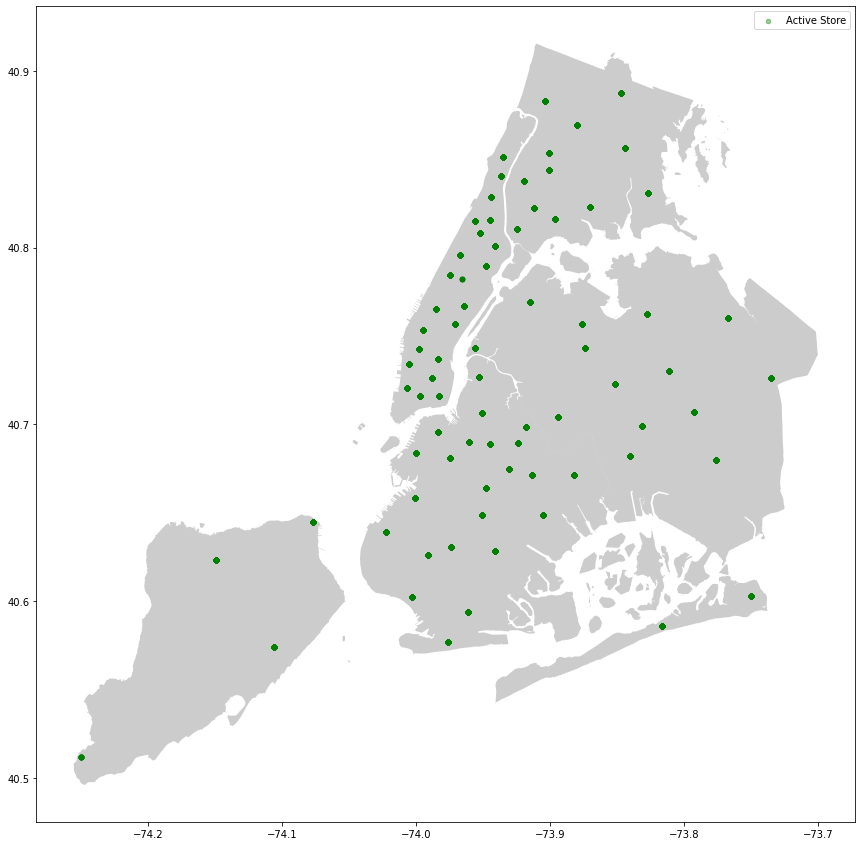

In [ ]:
plot_data = recent_pdf.loc[recent_pdf['OFNS_DESC'].isin(ofns_subset[5:6]), :]
plot_data.info()

geometry = [Point(x, y) for x, y in zip(plot_data['Longitude'].astype(float).values, plot_data['Latitude'].astype(float).values)]
# gdf = GeoDataFrame(recent_pdf, geometry=geometry)   

crs={'init':'epsg:4326'}

boroughs = gpd.read_file(geoplot.datasets.get_path('nyc_boroughs'))

geo_df=gpd.GeoDataFrame(plot_data,crs=crs,geometry=gpd.points_from_xy(plot_data["Longitude"], plot_data["Latitude"]))



fig,ax=plt.subplots(figsize=(15,15))
boroughs.plot(ax=ax,alpha=0.4,color="grey")
geo_df.plot(ax=ax,markersize=20, alpha=0.4,color="green", label="Active Store")
plt.legend()

In [ ]:
#clustering based on counts for subset of offenses
cat1 = ['MURDER & NON-NEGL. MANSLAUGHTER', 'FELONY ASSAULT']
cat2 = ['RAPE', 'SEX CRIMES', 'FELONY SEX CRIMES', 'OFFENSES RELATED TO CHILDREN', 'KIDNAPPING', 'KIDNAPPING & RELATED OFFENSES']
cat3 = ['ARSON','OFFENSES AGAINST THE PERSON','DANGEROUS WEAPONS','DANGEROUS DRUGS','UNLAWFUL POSS. WEAP. ON SCHOOL','INTOXICATED & IMPAIRED DRIVING','OFFENSES AGAINST PUBLIC SAFETY','HOMICIDE-NEGLIGENT-VEHICLE','INTOXICATED/IMPAIRED DRIVING','ESCAPE 3']

recent_pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385373 entries, 0 to 385372
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   CMPLNT_NUM                385373 non-null  object        
 1   ADDR_PCT_CD               385373 non-null  float64       
 2   BORO_NM                   385373 non-null  object        
 3   zipcode                   385373 non-null  object        
 4   CRM_ATPT_CPTD_CD          385373 non-null  object        
 5   JURISDICTION_CODE         385373 non-null  int64         
 6   JURIS_DESC                385373 non-null  object        
 7   KY_CD                     385373 non-null  int64         
 8   LAW_CAT_CD                385373 non-null  object        
 9   OFNS_DESC                 385373 non-null  object        
 10  PATROL_BORO               385373 non-null  object        
 11  PD_CD                     385373 non-null  float64       
 12  PD

In [ ]:
#calculate counts for each zip, category
counts_by_year_zip_cat = recent_pdf.loc[:, ['CMPLNT_NUM', 'Year', 'zipcode', 'OFNS_DESC']].groupby(by = ['Year', 'zipcode', 'OFNS_DESC']).count()
input_data = pd.DataFrame(columns = ['zipcode', 'Cat1Count', 'Cat2Count', 'Cat3Count'])
for zip in counts_by_year_zip_cat.index.levels[1]:
  zip_counts = counts_by_year_zip_cat.xs(zip, level='zipcode')
  
  cat1Count, cat2Count, cat3Count = 0, 0, 0

  for c1 in cat1:
    if c1 in zip_counts.index.get_level_values(1):
      cat1Count += zip_counts.xs(c1, level = 'OFNS_DESC').sum()[0]
  
  for c2 in cat2:
    if c2 in zip_counts.index.get_level_values(1):
      cat2Count += zip_counts.xs(c2, level = 'OFNS_DESC').sum()[0]
  
  for c3 in cat3:
    if c3 in zip_counts.index.get_level_values(1):
      cat3Count += zip_counts.xs(c3, level = 'OFNS_DESC').sum()[0]
  input_data.loc[len(input_data.index), : ] = [zip, cat1Count, cat2Count, cat3Count]
# input_data.index = input_data['zipcode']
# # each row should have [FelonyCount, MisdemeanorCount, ViolationCount] where the index is zipcode

In [ ]:
input_data.info()
input_data.sort_values(by='Cat1Count', ascending=False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 195
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   zipcode    196 non-null    object
 1   Cat1Count  196 non-null    object
 2   Cat2Count  196 non-null    object
 3   Cat3Count  196 non-null    object
dtypes: object(4)
memory usage: 11.7+ KB


zipcode Cat1Count Cat2Count Cat3Count
65    10457      1019       179       309
105   11207       835       149       265
60    10452       792       150       223
62    10454       633       115       330
80    10472       593       105       156
..      ...       ...       ...       ...
72    10464         0         0        10
70    10462         0         3        65
68    10460         0         1        79
67    10459         0         3       157
195   11697         0         0         2

[196 rows x 4 columns]

In [ ]:
from sklearn import preprocessing
import numpy as np

X_train = input_data.loc[:, ['Cat1Count', 'Cat2Count', 'Cat3Count']].values
scaler = preprocessing.StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)

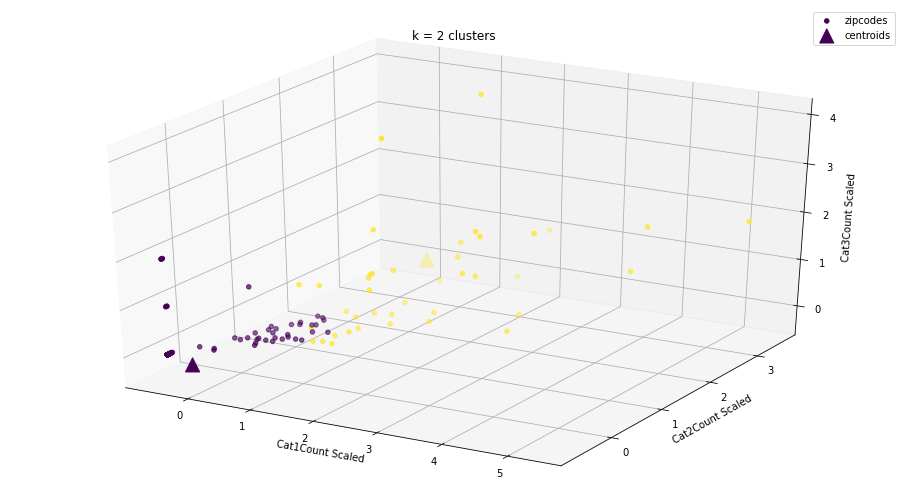

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



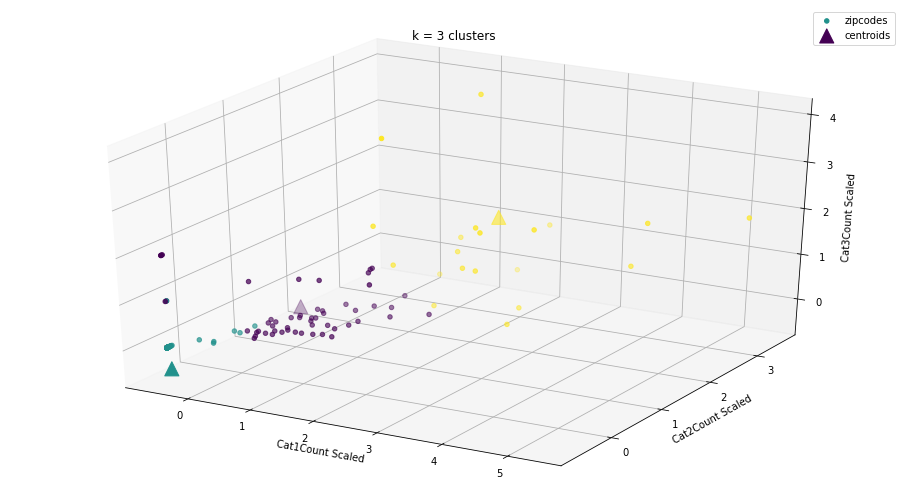

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



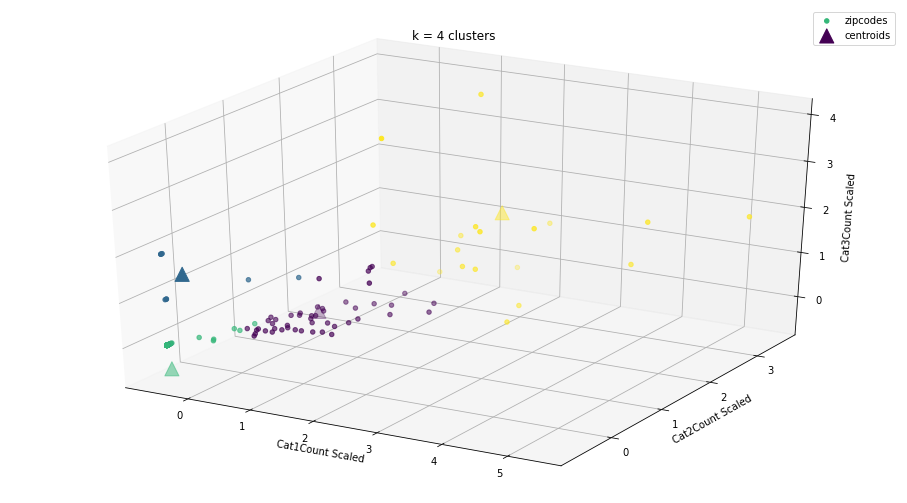

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



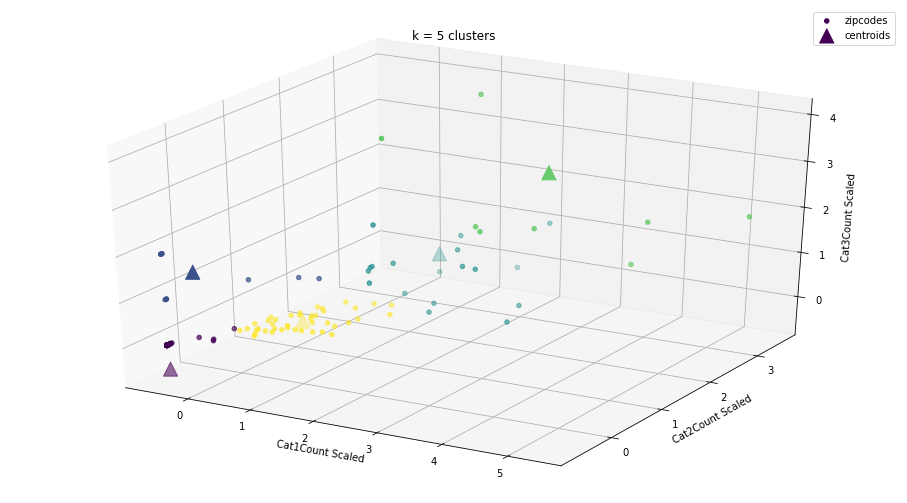

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



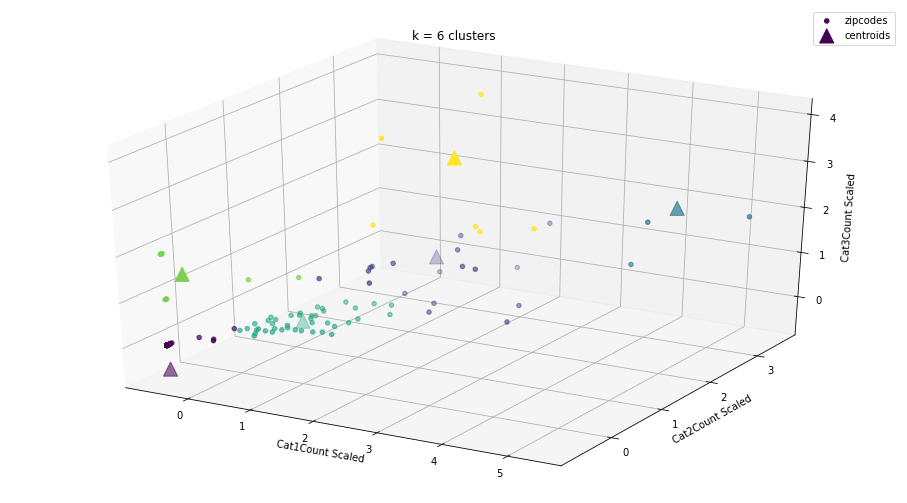

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



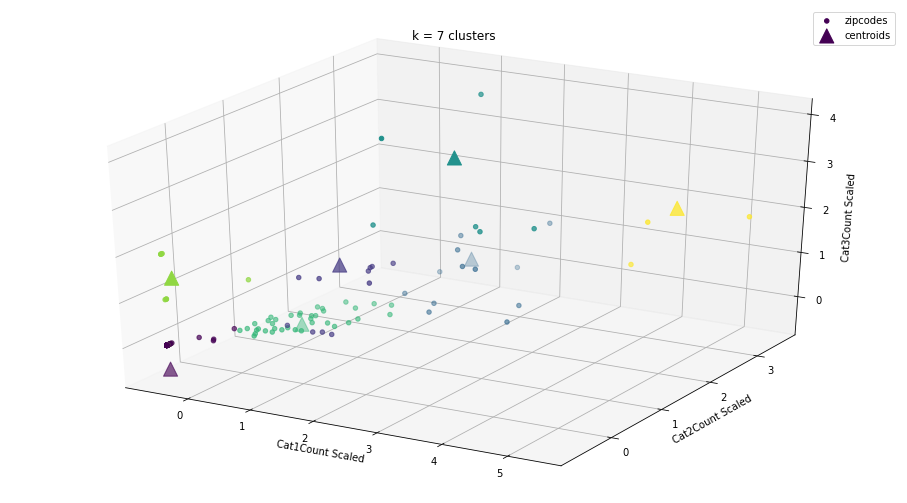

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



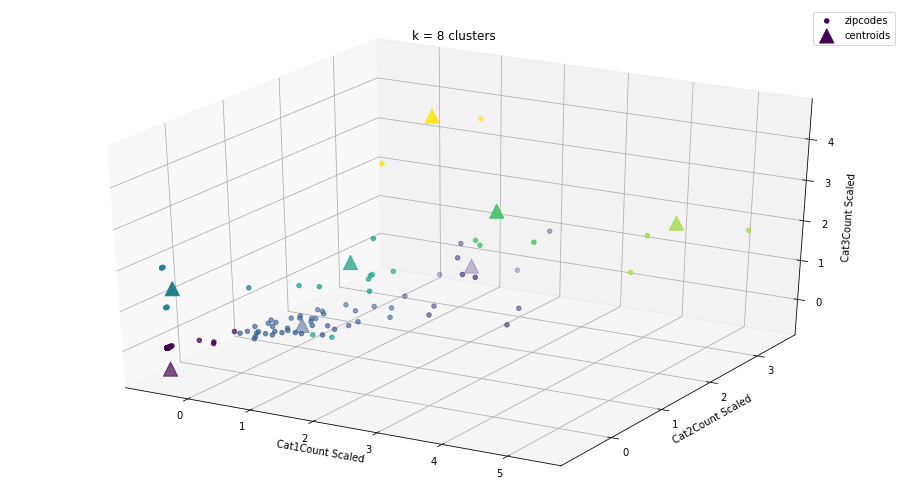

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



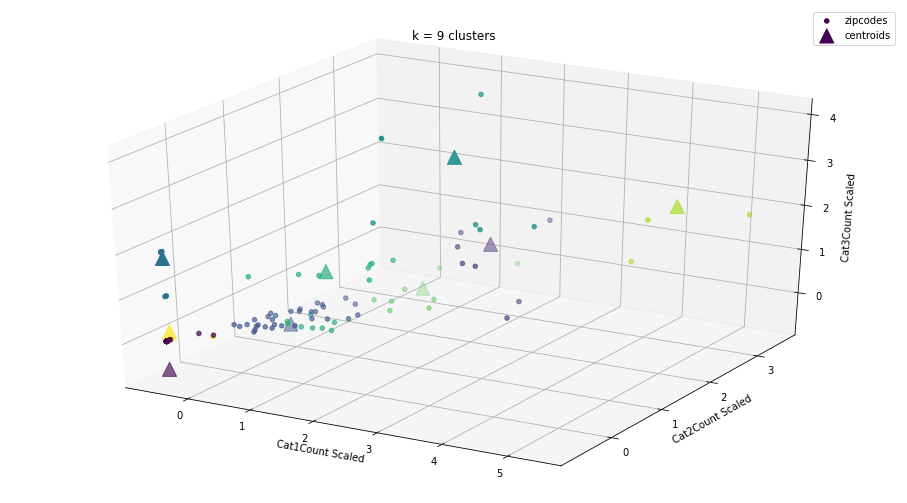

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



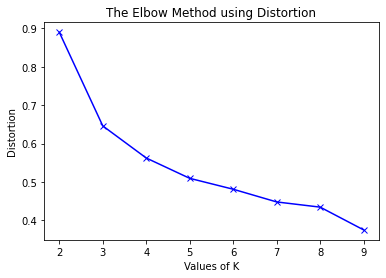

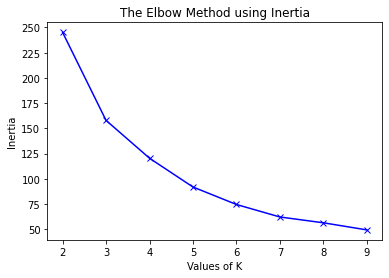

In [ ]:
#unsupervised classification of zipcodes
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

k_vals = list(range(2,10))
distortions = []
inertias = []
for k in k_vals:
  kmeans = KMeans(init="k-means++", n_clusters=k, n_init=4, random_state=1)
  kmeans = kmeans.fit(X_scaled)
  labels = kmeans.labels_

  distortions.append(sum(np.min(cdist(X_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])
  inertias.append(kmeans.inertia_)
  
  # plot clusters
  xs = X_scaled[:, 0]
  ys = X_scaled[:, 1]
  zs = X_scaled[:, 2]
  fig = plt.figure(figsize = (16, 9))
  ax = fig.add_subplot(projection='3d')
  ax.scatter(xs, ys, zs.astype(int), c=labels, label='zipcodes')

  xc = []
  yc = []
  zc = []
  scaled_centers = kmeans.cluster_centers_
  for scaled_center in scaled_centers:
    xc.append(scaled_center[0])
    yc.append(scaled_center[1])
    zc.append(scaled_center[2])
  
  ax.scatter(xc, yc, zc, c=[i for i in range(k)], marker = '^', s = 200, label = 'centroids')

  ax.set_xlabel('Cat1Count Scaled')
  ax.set_ylabel('Cat2Count Scaled')
  ax.set_zlabel('Cat3Count Scaled')
  plt.legend()
  plt.title(f'k = {k} clusters')
  plt.show()

  #visualising clusters in 2d
  features = X_scaled

  tsne = TSNE(n_components=2, random_state=0)
  projections = tsne.fit_transform(features)

  fig = px.scatter(
      projections, x=0, y=1,
      color=labels, labels={'color': 'Cluster ID'}
  )
  fig.show()

plt.plot(k_vals, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


plt.plot(k_vals, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
#visualizing in 2d
from sklearn.manifold import TSNE
import plotly.express as px
features = X_scaled

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=labels, labels={'color': 'Cluster ID'}
)
fig.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
#add new column denoting which category the crime falls in from the above
cat1 = ['MURDER & NON-NEGL. MANSLAUGHTER', 'FELONY ASSAULT']
cat2 = ['RAPE', 'SEX CRIMES', 'FELONY SEX CRIMES', 'OFFENSES RELATED TO CHILDREN', 'KIDNAPPING', 'KIDNAPPING & RELATED OFFENSES']
cat3 = ['ARSON','OFFENSES AGAINST THE PERSON','DANGEROUS WEAPONS','DANGEROUS DRUGS','UNLAWFUL POSS. WEAP. ON SCHOOL','INTOXICATED & IMPAIRED DRIVING','OFFENSES AGAINST PUBLIC SAFETY','HOMICIDE-NEGLIGENT-VEHICLE','INTOXICATED/IMPAIRED DRIVING','ESCAPE 3']
cat4 = ['ROBBERY', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 'BURGLARY', 'UNAUTHORIZED USE OF A VEHICLE', 'THEFT-FRAUD', 'OTHER OFFENSES RELATED TO THEF', 'PETIT LARCENY', 'PETIT LARCENY OF MOTOR VEHICLE']

if 'OffenseCategory' not in recent_pdf.columns:
  recent_pdf['OffenseCategory'] = [""] * len(recent_pdf.index)

recent_pdf['OffenseCategory'] = recent_pdf.apply(lambda x : 'Category1' if x['OFNS_DESC'] in cat1 else ('Category2' if x['OFNS_DESC'] in cat2 else ('Category3' if x['OFNS_DESC'] in cat3 else ('Category4' if x['OFNS_DESC'] in cat4 else 'Other'))), axis = 1)


In [ ]:
recent_pdf.to_csv(os.path.join(cur_dir, data_dir, 'current_category_cleaned_data.csv'), index = False)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



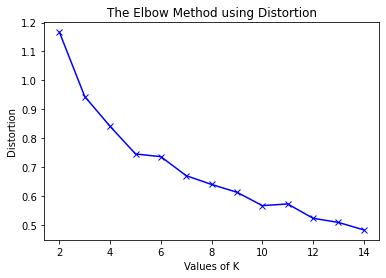

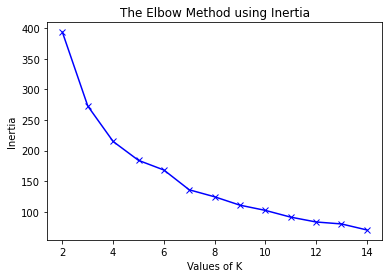

In [17]:
cat1 = ['MURDER & NON-NEGL. MANSLAUGHTER', 'FELONY ASSAULT']
cat2 = ['RAPE', 'SEX CRIMES', 'FELONY SEX CRIMES', 'OFFENSES RELATED TO CHILDREN', 'KIDNAPPING', 'KIDNAPPING & RELATED OFFENSES']
cat3 = ['ARSON','OFFENSES AGAINST THE PERSON','DANGEROUS WEAPONS','DANGEROUS DRUGS','UNLAWFUL POSS. WEAP. ON SCHOOL','INTOXICATED & IMPAIRED DRIVING','OFFENSES AGAINST PUBLIC SAFETY','HOMICIDE-NEGLIGENT-VEHICLE','INTOXICATED/IMPAIRED DRIVING','ESCAPE 3']
cat4 = ['ROBBERY', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 'BURGLARY', 'UNAUTHORIZED USE OF A VEHICLE', 'THEFT-FRAUD', 'OTHER OFFENSES RELATED TO THEF', 'PETIT LARCENY', 'PETIT LARCENY OF MOTOR VEHICLE']


counts_by_year_zip_cat = recent_pdf.loc[:, ['CMPLNT_NUM', 'Year', 'zipcode', 'OFNS_DESC']].groupby(by = ['Year', 'zipcode', 'OFNS_DESC']).count()
input_data = pd.DataFrame(columns = ['zipcode', 'Cat1Count', 'Cat2Count', 'Cat3Count', 'Cat4Count'])
for zip in counts_by_year_zip_cat.index.levels[1]:
  zip_counts = counts_by_year_zip_cat.xs(zip, level='zipcode')
  
  cat1Count, cat2Count, cat3Count, cat4Count = 0, 0, 0, 0

  for c1 in cat1:
    if c1 in zip_counts.index.get_level_values(1):
      cat1Count += zip_counts.xs(c1, level = 'OFNS_DESC').sum()[0]
  
  for c2 in cat2:
    if c2 in zip_counts.index.get_level_values(1):
      cat2Count += zip_counts.xs(c2, level = 'OFNS_DESC').sum()[0]
  
  for c3 in cat3:
    if c3 in zip_counts.index.get_level_values(1):
      cat3Count += zip_counts.xs(c3, level = 'OFNS_DESC').sum()[0]
  
  for c4 in cat4:
    if c4 in zip_counts.index.get_level_values(1):
      cat4Count += zip_counts.xs(c4, level = 'OFNS_DESC').sum()[0]
  input_data.loc[len(input_data.index), : ] = [zip, cat1Count, cat2Count, cat3Count, cat4Count]



from sklearn import preprocessing
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px

X_train = input_data.loc[:, ['Cat1Count', 'Cat2Count', 'Cat3Count', 'Cat4Count']].values
scaler = preprocessing.StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)



#unsupervised classification of zipcodes
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

k_vals = list(range(2,15))
distortions = []
inertias = []
for k in k_vals:
  kmeans = KMeans(init="k-means++", n_clusters=k, n_init=4, random_state=7)
  kmeans = kmeans.fit(X_scaled)
  labels = kmeans.labels_

  distortions.append(sum(np.min(cdist(X_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])
  inertias.append(kmeans.inertia_)
  
  # # plot clusters
  # xs = X_scaled[:, 0]
  # ys = X_scaled[:, 1]
  # zs = X_scaled[:, 2]
  # zws = X_scaled[:, 3]
  # fig = plt.figure(figsize = (16, 9))
  # ax = fig.add_subplot(projection='3d')
  # ax.scatter(xs, ys, zs.astype(int), c=labels, label='zipcodes')

  # xc = []
  # yc = []
  # zc = []
  # scaled_centers = kmeans.cluster_centers_
  # for scaled_center in scaled_centers:
  #   xc.append(scaled_center[0])
  #   yc.append(scaled_center[1])
  #   zc.append(scaled_center[2])
  
  # ax.scatter(xc, yc, zc, c=[i for i in range(k)], marker = '^', s = 200, label = 'centroids')

  # ax.set_xlabel('Cat1Count Scaled')
  # ax.set_ylabel('Cat2Count Scaled')
  # ax.set_zlabel('Cat3Count Scaled')
  # plt.legend()
  # plt.title(f'k = {k} clusters')
  # plt.show()

  #visualising clusters in 2d
  features = X_scaled

  tsne = TSNE(n_components=2, random_state=0)
  projections = tsne.fit_transform(features)

  fig = px.scatter(
      projections, x=0, y=1,
      color=labels, labels={'color': 'Cluster ID'}
  )
  fig.show()

plt.plot(k_vals, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


plt.plot(k_vals, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [18]:
# cat1 = ['MURDER & NON-NEGL. MANSLAUGHTER', 'FELONY ASSAULT']
# cat2 = ['RAPE', 'SEX CRIMES', 'FELONY SEX CRIMES', 'OFFENSES RELATED TO CHILDREN', 'KIDNAPPING', 'KIDNAPPING & RELATED OFFENSES']
# cat3 = ['ARSON','OFFENSES AGAINST THE PERSON','DANGEROUS WEAPONS','DANGEROUS DRUGS','UNLAWFUL POSS. WEAP. ON SCHOOL','INTOXICATED & IMPAIRED DRIVING','OFFENSES AGAINST PUBLIC SAFETY','HOMICIDE-NEGLIGENT-VEHICLE','INTOXICATED/IMPAIRED DRIVING','ESCAPE 3']
# cat4 = ['ROBBERY', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 'BURGLARY', 'UNAUTHORIZED USE OF A VEHICLE', 'THEFT-FRAUD', 'OTHER OFFENSES RELATED TO THEF', 'PETIT LARCENY', 'PETIT LARCENY OF MOTOR VEHICLE']


# counts_by_year_zip_cat = recent_pdf.loc[:, ['CMPLNT_NUM', 'Year', 'zipcode', 'OFNS_DESC']].groupby(by = ['Year', 'zipcode', 'OFNS_DESC']).count()
# input_data = pd.DataFrame(columns = ['zipcode', 'Cat1Count', 'Cat2Count', 'Cat3Count', 'Cat4Count'])
# for zip in counts_by_year_zip_cat.index.levels[1]:
#   zip_counts = counts_by_year_zip_cat.xs(zip, level='zipcode')
  
#   cat1Count, cat2Count, cat3Count, cat4Count = 0, 0, 0, 0

#   for c1 in cat1:
#     if c1 in zip_counts.index.get_level_values(1):
#       cat1Count += zip_counts.xs(c1, level = 'OFNS_DESC').sum()[0]
  
#   for c2 in cat2:
#     if c2 in zip_counts.index.get_level_values(1):
#       cat2Count += zip_counts.xs(c2, level = 'OFNS_DESC').sum()[0]
  
#   for c3 in cat3:
#     if c3 in zip_counts.index.get_level_values(1):
#       cat3Count += zip_counts.xs(c3, level = 'OFNS_DESC').sum()[0]
  
#   for c4 in cat4:
#     if c4 in zip_counts.index.get_level_values(1):
#       cat4Count += zip_counts.xs(c4, level = 'OFNS_DESC').sum()[0]
#   input_data.loc[len(input_data.index), : ] = [zip, cat1Count, cat2Count, cat3Count, cat4Count]



# from sklearn import preprocessing
# import numpy as np
# from sklearn.manifold import TSNE
# import plotly.express as px

X_train = input_data.loc[:, ['Cat1Count', 'Cat2Count', 'Cat3Count', 'Cat4Count']].values
scaler = preprocessing.StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)



#unsupervised classification of zipcodes
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

k_vals = list(range(7,8))
distortions = []
inertias = []
for k in k_vals:
  kmeans = KMeans(init="k-means++", n_clusters=k, n_init=4, random_state=7)
  kmeans = kmeans.fit(X_scaled)
  labels = kmeans.labels_

  distortions.append(sum(np.min(cdist(X_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])
  inertias.append(kmeans.inertia_)

  #visualising clusters in 2d
  features = X_scaled

  tsne = TSNE(n_components=2, random_state=0)
  projections = tsne.fit_transform(features)

  fig = px.scatter(
      projections, x=0, y=1,
      color=labels, labels={'color': 'Cluster ID'}
  )
  fig.show()

print(kmeans.cluster_centers_)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[[-5.68662509e-01 -6.40184766e-01 -6.69850888e-01 -8.45399972e-01]
 [ 2.00478994e+00  1.69143280e+00  3.37165641e+00  1.44058361e+00]
 [-1.01036932e-01 -8.64298822e-04  7.89806271e-01  1.86531669e+00]
 [ 1.64233528e+00  1.95691658e+00  1.04051305e+00  7.51473369e-01]
 [ 4.88989735e-01  7.26739733e-01 -3.71560081e-02  1.18166389e-01]
 [ 4.57142659e+00  2.82635318e+00  2.24081426e+00  1.23219109e+00]
 [-5.57608308e-01 -6.13397958e-01 -3.16508942e-02  2.11508072e-01]]


In [13]:
#original centroids
scaler.scale_ * kmeans.cluster_centers_ + scaler.mean_

array([[2.16666667e+00, 1.01190476e+00, 1.68571429e+01, 2.64380952e+02],
       [4.42666667e+02, 1.07500000e+02, 3.62333333e+02, 1.72516667e+03],
       [8.22105263e+01, 3.02105263e+01, 1.41631579e+02, 1.99657895e+03],
       [3.80625000e+02, 1.19625000e+02, 1.63062500e+02, 1.28481250e+03],
       [1.83205882e+02, 6.34411765e+01, 7.09411765e+01, 8.80117647e+02],
       [8.82000000e+02, 1.59333333e+02, 2.65666667e+02, 1.59200000e+03],
       [4.05882353e+00, 2.23529412e+00, 7.14117647e+01, 9.39764706e+02]])

In [19]:
ground_truth_data = input_data
ground_truth_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 195
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   zipcode    196 non-null    object
 1   Cat1Count  196 non-null    object
 2   Cat2Count  196 non-null    object
 3   Cat3Count  196 non-null    object
 4   Cat4Count  196 non-null    object
dtypes: object(5)
memory usage: 13.3+ KB


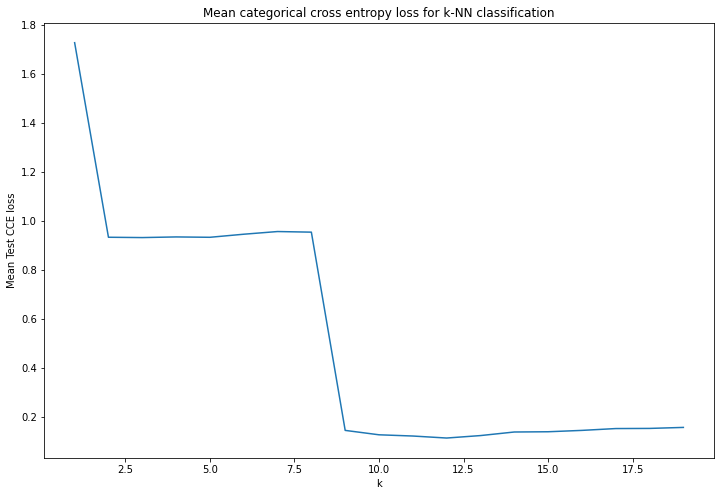

In [21]:
#zip,date,cat1_pred,cat2_pred,cat3_pred,cat4_pred
#zip,date,clst1_prob,clst2_prob,clst3_prob,clst4_prob,clst5_prob,clst6_prob,clst7_prob
#zip,date,CCE_loss
#zip,Avg_CCE_loss

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

#Scale data as required

X = ground_truth_data.loc[:, ['Cat1Count', 'Cat2Count', 'Cat3Count', 'Cat4Count']].values #predicted count for day
# X_scaled = scaler.transform(X * 272)  #'Cat1Count', 'Cat2Count', 'Cat3Count', 'Cat4Count' for year, scaled
X_scaled = scaler.transform(X)

X_train = X_scaled[:int(196*0.8), :]

X_test = X_scaled[int(196*0.8):, :]
# y = kmeans.labels_ #based on 'Cat1Count', 'Cat2Count', 'Cat3Count', 'Cat4Count' for year, scaled
y = kmeans.predict(X_scaled)
y_train = y[:int(196*0.8)]
y_test = y[int(196*0.8):]

# k_vals = [3,5,7,9]
k_vals = list(range(1,20))
cce_losses = []
for k in k_vals:
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train, y_train)
  predicted_probs = neigh.predict_proba(X_test) #num_zips x num_clusters
  cce_loss = log_loss(y_test, predicted_probs, labels = list(range(0,7)))
  cce_losses.append(cce_loss)

plt.figure(figsize = (12,8))
plt.plot(k_vals, cce_losses)
plt.title('Mean categorical cross entropy loss for k-NN classification')
plt.xlabel('k')
plt.ylabel('Mean Test CCE loss')

plt.show()

# #choose best k for knn
# #output clusters for each day for last 30 days
# neigh = KNeighborsClassifier(n_neighbors=k)
# neigh.fit(X_scaled, y)
# outputs = neigh.predict(X_scaled)
# ground_truth_data.loc[:, ['predicted_cluster']] = outputs

# print('zipcode', 'predicted cluster', 'cluster_center')
# for row in ground_truth_data.loc[:, ['zipcode', 'predicted_cluster']].values:
#   print(row[0], row[1], kmeans.cluster_centers_[row[1]])


In [29]:
#zip,date,cat1_pred,cat2_pred,cat3_pred,cat4_pred
#zip,date,clst1_prob,clst2_prob,clst3_prob,clst4_prob,clst5_prob,clst6_prob,clst7_prob
#zip,date,CCE_loss
#zip,Avg_CCE_loss

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

#Scale data as required
# predicted_data = pd.read_csv(os.path.join(cur_dir, data_dir, 'ARIMA_pred.csv'))
predicted_data = pd.read_csv(os.path.join(cur_dir, data_dir, 'Auto_ARIMA_pred.csv'))
X_new = predicted_data.loc[:, ['Category1', 'Category2', 'Category3', 'Category4']].values

X = ground_truth_data.loc[:, ['Cat1Count', 'Cat2Count', 'Cat3Count', 'Cat4Count']].values #predicted count for day
# X_scaled = scaler.transform(X * 272)  #'Cat1Count', 'Cat2Count', 'Cat3Count', 'Cat4Count' for year, scaled
X_scaled = scaler.transform(X)
X_new_scaled = scaler.transform(X_new * 272.)

# y = kmeans.labels_ #based on 'Cat1Count', 'Cat2Count', 'Cat3Count', 'Cat4Count' for year, scaled
y = kmeans.predict(X_scaled)

k_best = 9
#choose best k for knn
#output clusters for each day for last 30 days
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_scaled, y)
outputs = neigh.predict(X_new_scaled)
predicted_data.loc[:, ['predicted_cluster']] = outputs

# print('zipcode', 'predicted cluster', 'cluster_center')
# for row in predicted_data.loc[:, ['zipcode', 'predicted_cluster']].values:
#   print(row[0], row[1], kmeans.cluster_centers_[row[1]])


() (5880,)
{0, 1, 2, 3, 4, 5, 6} {0, 1, 2, 3, 4, 6}


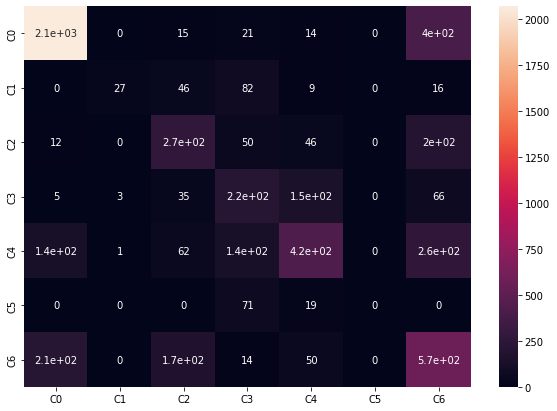

In [30]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

predicted_data.loc[:, ['zipcode']] = predicted_data['zipcode'].astype(str).apply(lambda x: x.zfill(5))
y_true = [gt_clusters_dict[str(zip[0])] for zip in predicted_data.loc[:, ['zipcode']].values]
y_pred = predicted_data['predicted_cluster'].values
print(y_true[0].shape, y_pred.shape)
print(set(y_true), set(y_pred))
cm = confusion_matrix(y_true, y_pred, labels = [i for i in range(0,7)])

df_cm = pd.DataFrame(cm, index = [f'C{i}' for i in "0123456"],
                  columns = [f'C{i}' for i in "0123456"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [40]:
kmeans.cluster_centers_

array([[-5.68662509e-01, -6.40184766e-01, -6.69850888e-01,
        -8.45399972e-01],
       [ 2.00478994e+00,  1.69143280e+00,  3.37165641e+00,
         1.44058361e+00],
       [-1.01036932e-01, -8.64298822e-04,  7.89806271e-01,
         1.86531669e+00],
       [ 1.64233528e+00,  1.95691658e+00,  1.04051305e+00,
         7.51473369e-01],
       [ 4.88989735e-01,  7.26739733e-01, -3.71560081e-02,
         1.18166389e-01],
       [ 4.57142659e+00,  2.82635318e+00,  2.24081426e+00,
         1.23219109e+00],
       [-5.57608308e-01, -6.13397958e-01, -3.16508942e-02,
         2.11508072e-01]])

In [75]:
input_data.head()

zipcode Cat1Count Cat2Count Cat3Count Cat4Count
0   07002         0         0         0         5
1   07008         0         0         1         7
2   07020         0         0         7        65
3   07077         0         0         0         1
4   10001         0         1        57       763

In [24]:
temp = input_data.loc[:, ['Cat1Count', 'Cat2Count', 'Cat3Count', 'Cat4Count']].values
# scaler = preprocessing.StandardScaler().fit(X_train)

temp1 = scaler.transform(temp)

In [25]:
temp1[:5, :]

array([[-0.58132043, -0.662341  , -0.86705193, -1.25130523],
       [-0.58132043, -0.662341  , -0.85535357, -1.24817543],
       [-0.58132043, -0.662341  , -0.78516336, -1.15741123],
       [-0.58132043, -0.662341  , -0.86705193, -1.25756483],
       [-0.58132043, -0.64044543, -0.20024501, -0.06511102]])

In [26]:
gt_clusters = kmeans.predict(temp1)


In [27]:
gt_clusters_dict = {}
i = 0
for zip in input_data.loc[:, ['zipcode']].values:
  gt_clusters_dict[zip[0]] = gt_clusters[i]
  i += 1


In [82]:
gt_clusters_dict.keys()

dict_keys(['07002', '07008', '07020', '07077', '10001', '10002', '10003', '10004', '10005', '10009', '10010', '10011', '10012', '10013', '10014', '10015', '10016', '10017', '10018', '10019', '10020', '10021', '10022', '10023', '10024', '10026', '10027', '10028', '10029', '10030', '10031', '10032', '10033', '10034', '10035', '10037', '10039', '10040', '10044', '10065', '10069', '10075', '10098', '10115', '10280', '10282', '10301', '10302', '10303', '10304', '10305', '10306', '10307', '10308', '10309', '10310', '10311', '10312', '10314', '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10461', '10462', '10463', '10464', '10465', '10466', '10467', '10468', '10469', '10470', '10471', '10472', '10473', '10474', '10475', '10550', '10705', '11001', '11004', '11005', '11020', '11021', '11042', '11096', '11101', '11102', '11103', '11104', '11105', '11106', '11109', '11201', '11203', '11204', '11205', '11206', '11207', '11208', '11209', '11210', '11211',